In [29]:
!pip install librosa==0.9.2
# !pip install sounddevice
# !sudo apt-get install libportaudio2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.8 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


In [1]:
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import time
import soundfile as sf

In [2]:
#1η ΑΣΚΗΣΗ
#1.1
row = np.array([0.5346, 0.5906, 0.6535])
column = np.array([0.9273, 1.0247, 1.1328])

n = np.linspace(0, 1000, 1000)

def sound(row, column):
    return np.sin(row * n) + np.sin(column * n)

d = []
d = np.sin(0.7217 * n) + np.sin(1.0247 * n)

 
for r in row:
    for c in column:
        d = np.vstack((d, sound(r,c)))
    print(d.shape)
#for i in range(10):
 #   sd.play(d[i], 8192)
  #  time.sleep(2)
    

(4, 1000)
(7, 1000)
(10, 1000)


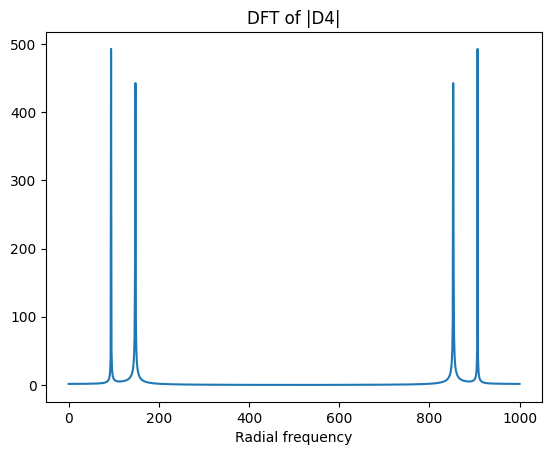

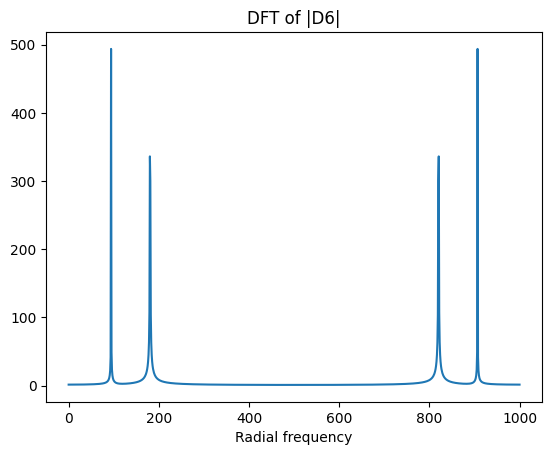

In [3]:
#1.2
D4 = np.fft.fft(d[4])
D6 = np.fft.fft(d[6])
#f = np.linspace(0,2*np.pi,1000)
f = np.linspace(0,1000,1000)

plt.plot(f,np.abs(D4))
plt.xlabel('Radial frequency')
plt.title('DFT of |D4|')
plt.show()
plt.plot(f,np.abs(D6))
plt.xlabel("Radial frequency") 
plt.title('DFT of |D6|')
plt.show()


In [4]:
#1.3
array_of_zeros = np.zeros(100)
thlefono = None
thlefono = np.concatenate((d[0], array_of_zeros, d[6]), axis = None)
thlefono = np.concatenate((thlefono, array_of_zeros, d[2]), axis = None)
thlefono = np.concatenate((thlefono, array_of_zeros, d[3]), axis = None)
thlefono = np.concatenate((thlefono, array_of_zeros, d[4]), axis = None)
thlefono = np.concatenate((thlefono, array_of_zeros, d[1]), axis = None)
thlefono = np.concatenate((thlefono, array_of_zeros, d[2]), axis = None)
thlefono = np.concatenate((thlefono, array_of_zeros, d[7]), axis = None)
#sd.play(thlefono, 8192)
fs = 8192
sf.write('./drive/MyDrive/6th/DSP/data/tone_sequence.wav', thlefono, fs)
print(thlefono.shape)


(8700,)


In [5]:
#1.4
#rectangular window
rec = np.ones(1000)

#hamming window
ham = np.hamming(1000)

#rectones = np.zeros((8, 1000)) #tones multiplied with rectangular
#hamtones = np.zeros((8, 1000)) #tones multiplied with humming

Drectones = np.zeros(1000) #DFT of rectones
Dhamtones = np.zeros(1000) #DFT of hamtones

tones = np.zeros((8, 1000))
for i in range (8):
    for j in range(1100 * i , (1100 * i) + 1000):
        tones[(i, (j - i) % 1000)] = thlefono[j]
    buffer1 = np.fft.fft(tones[i] * rec)
    buffer2 = np.fft.fft(tones[i] * ham)
    Drectones = np.vstack((Drectones, buffer1)) # the signals are from 1 to 9 / tones[i] * rec = Drectones[i + 1]
    Dhamtones = np.vstack((Dhamtones, buffer2)) # the signals are from 1 to 9 / tones[i] * ham = Dhamtones[i + 1]

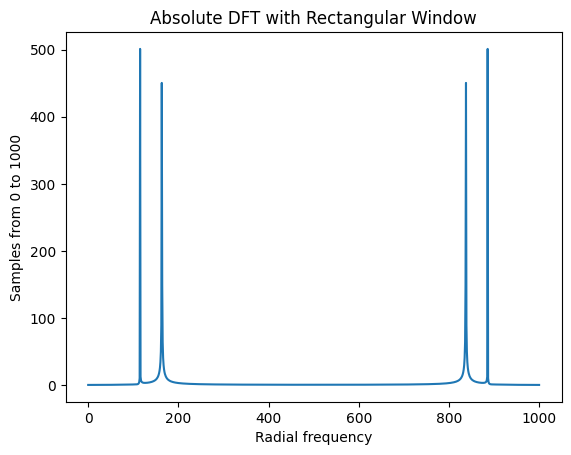

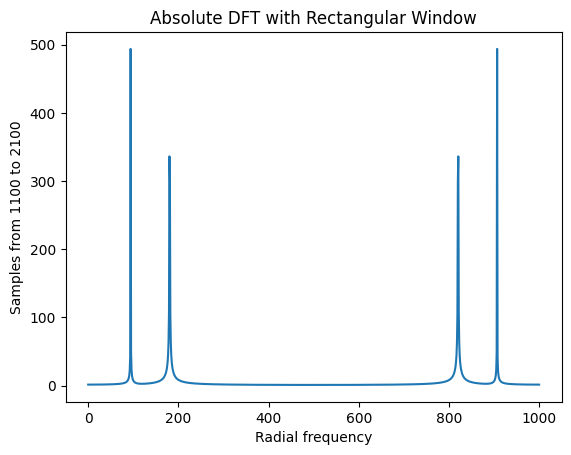

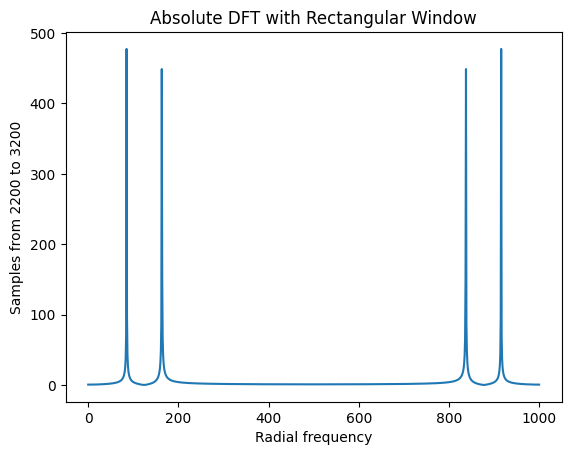

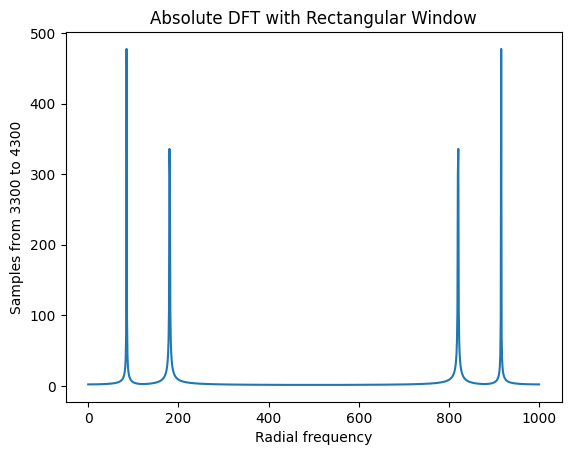

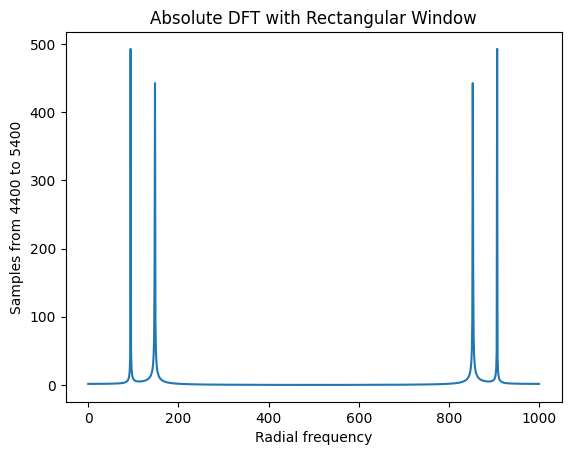

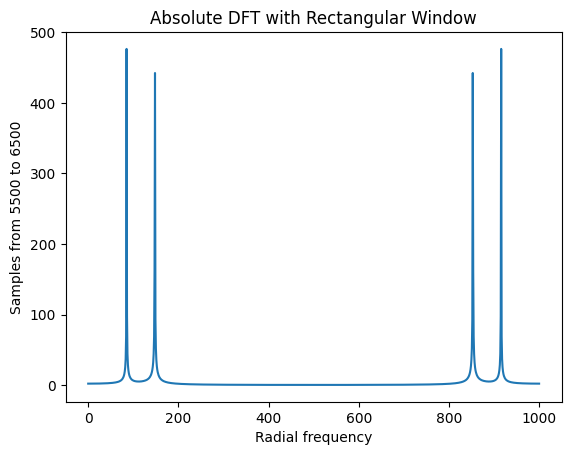

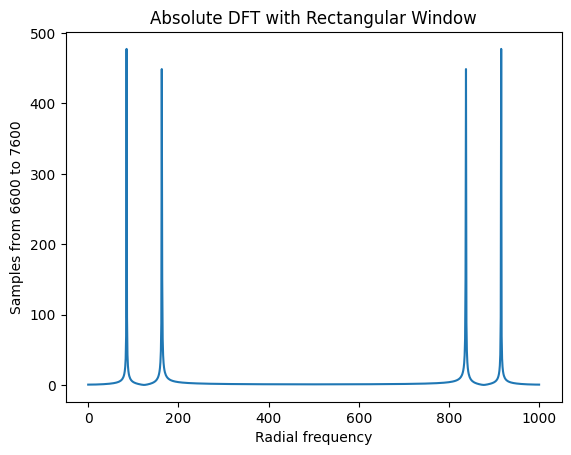

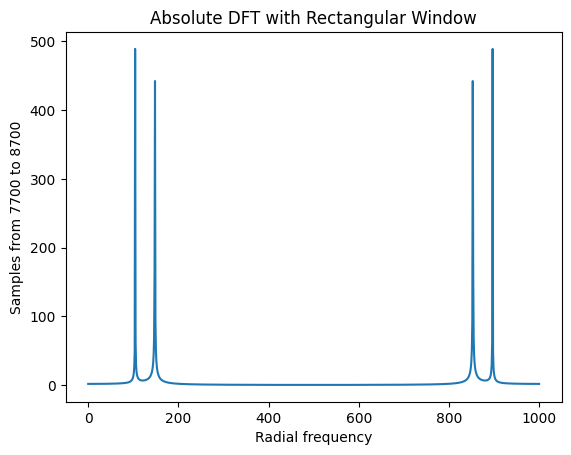

In [6]:
#continue...
for i in range(1, 9):
   
    plt.plot(f, np.abs(Drectones[i]))
    plt.xlabel('Radial frequency')
    plt.ylabel('Samples from %d to %d' % ((i - 1) * 1100, ((i - 1) * 1100) + 1000))
    plt.title('Absolute DFT with Rectangular Window')
    plt.show()

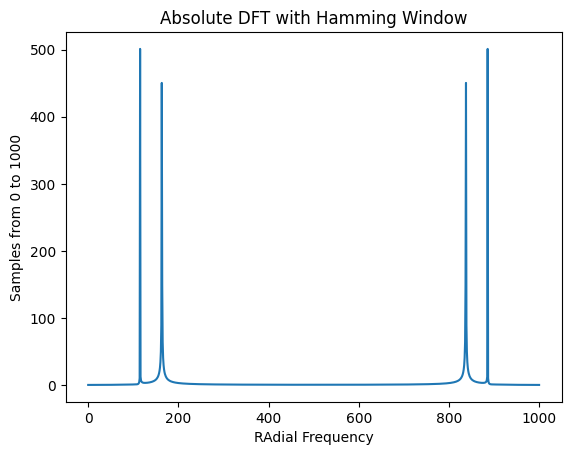

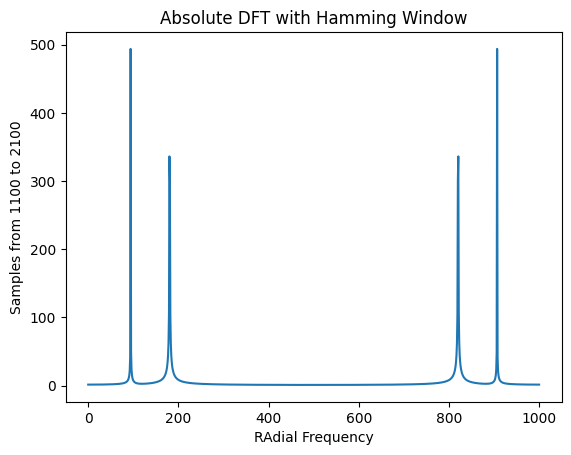

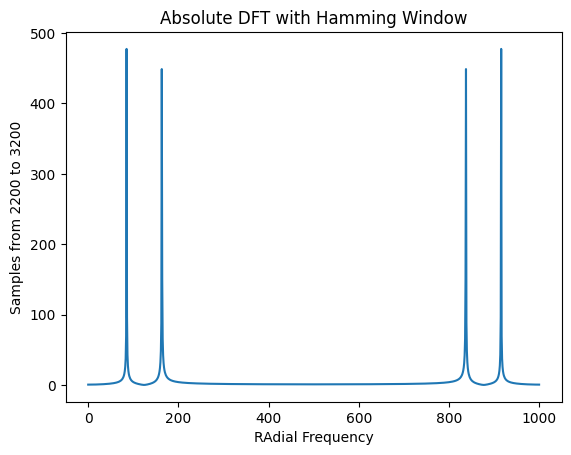

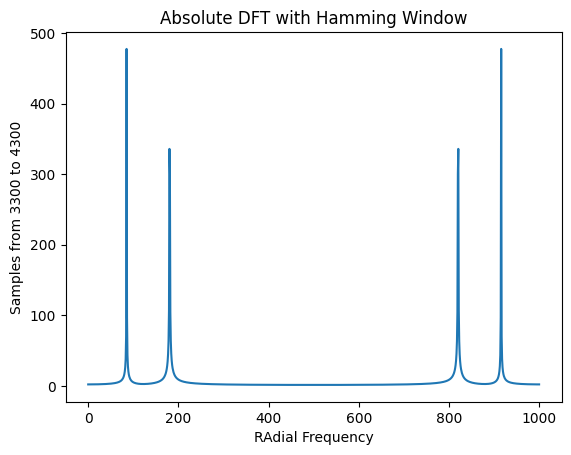

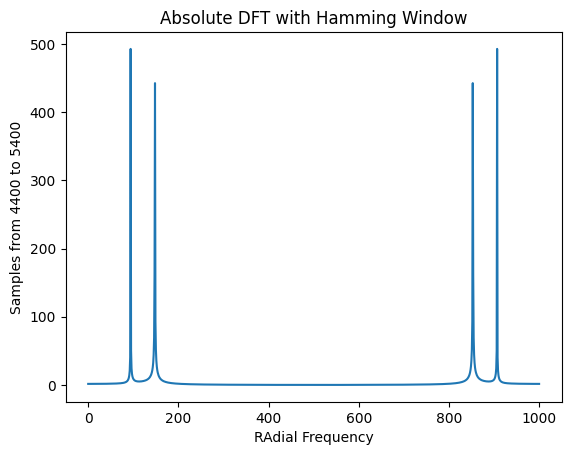

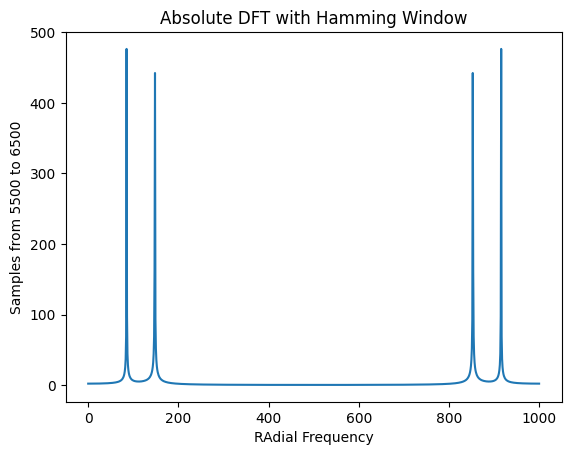

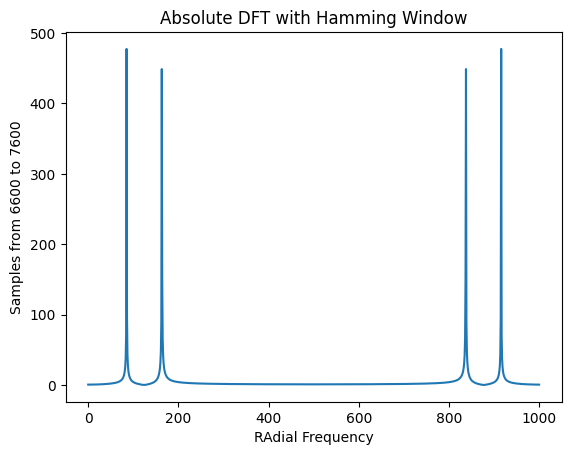

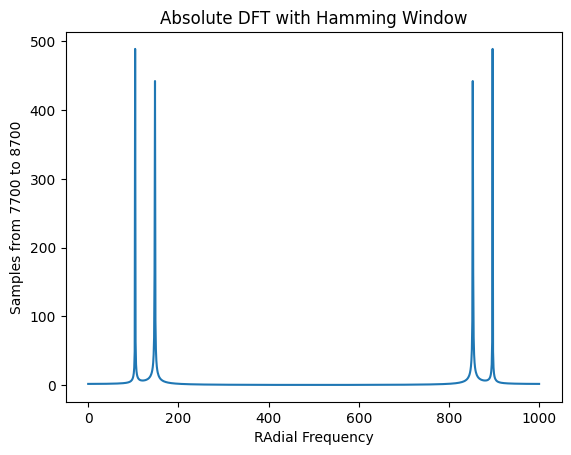

In [7]:
for i in range(1, 9):
    
    plt.plot(f, np.abs(Drectones[i]))
    plt.xlabel('RAdial Frequency')
    plt.ylabel('Samples from %d to %d' % ((i - 1) * 1100, ((i - 1) * 1100) + 1000))
    plt.title('Absolute DFT with Hamming Window')
    plt.show()

In [8]:
#1.5

kappa = sp.signal.find_peaks(np.abs(np.fft.fft(d[0])))
kappa = kappa[0]

Ωk = 2 * np.pi * kappa / 1000 
for i in range(1, 10):
    buff1 = sp.signal.find_peaks(np.abs(np.fft.fft(d[i])))
    buff1 = buff1[0]
   
    kappa = np.vstack((kappa, buff1))
    buff2 = 2 * np.pi * kappa[i] / 1000                #Ωk = (2 * π * k * fs)/ N   
    Ωk = np.vstack((Ωk, buff2))                               # ~51.4(Hz) * k 
    if(i % 4 == 1):                                   
        if(i == 1):
            print("The ks of digit 0 are %s and the frequencies are %s" %(kappa[0,:2], Ωk[0,:2]))
     
        print("The ks of digit %d are %s and the frequencies are %s" %(i,kappa[i,:2], Ωk[i,:2]))   

The ks of digit 0 are [115 163] and the frequencies are [0.72256631 1.02415921]
The ks of digit 1 are [ 85 148] and the frequencies are [0.53407075 0.92991143]
The ks of digit 5 are [ 94 163] and the frequencies are [0.59061942 1.02415921]
The ks of digit 9 are [104 180] and the frequencies are [0.65345127 1.13097336]


In [9]:
def find_the_k(signal):
    buff = sp.signal.find_peaks(signal, height = 17)
    buff = buff[0]
   
    return buff  
    
def ttdecode(signIn):
    energy = np.zeros(1000)
    vector = 0
    N = (signIn.size)
    r = 0
    sum = 0
    while(r < N ):
        if((signIn[r] == 0)):
            r = r + 1
            continue
        else:
            for i in range(1000):
                if(i == 0):
                    tone = signIn[r + i]
                else:
                    tone = np.concatenate((tone, signIn[r + i-1]), axis = None)
           
            sum += 1
            energy = (np.abs(np.fft.fft(tone))) ** 2
            kappa2 = find_the_k(energy)
            frequencies = 2 * np.pi * kappa2 / 1000         
                                  
            for j in range(10):
                if(np.array_equal(kappa2, kappa[j])):       #because the accuracy of bits for store is not perfect we find the tone from the k-indices
                        if(sum == 1):
                            vector = j
                        else:
                            vector = np.concatenate((vector, j), axis = None)
            r = r + 1000
       
    return vector


print(ttdecode(thlefono))

[0 6 2 3 4 1 2 7]


In [10]:
#1.7

easySig = np.load('./drive/MyDrive/6th/DSP/data/easySig.npy')

hardSig = np.load('./drive/MyDrive/6th/DSP/data/hardSig.npy')

In [11]:
vector_easy = ttdecode(easySig)
print("For easySig: ",vector_easy)

vector_hard = ttdecode(hardSig)
print("For hardSig: ",vector_hard)

For easySig:  [1 3 2 6 3 9 0 0]
For hardSig:  [9 0 9 6 3 2 1 1 9 1]


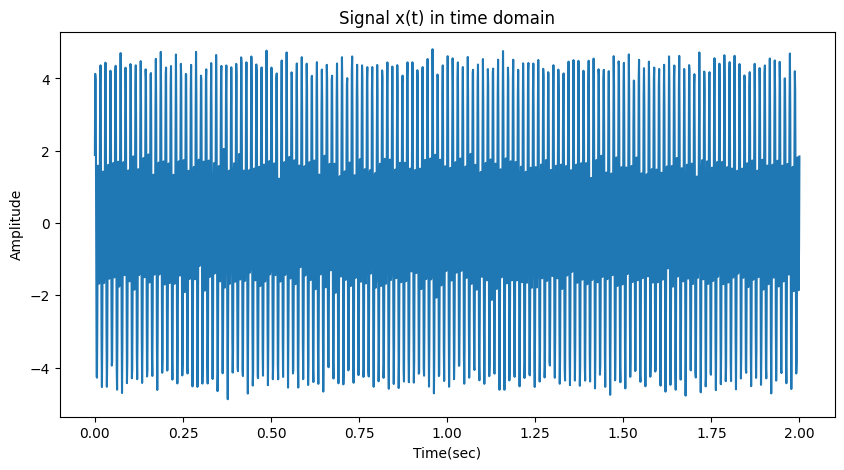

In [12]:
#Άσκηση 2η

#2.1.a
t = np.linspace(0, 2, 2000)                #fs = 1000 Hz
vt = np.random.normal(0, 1, 2000)

xt = 2 * np.cos(2 * np.pi * 70 *t) + 3 * np.sin(2 * np.pi * 140 * t) + 0.15 * vt
fig = plt.figure(figsize=(10,5))
plt.plot(t, xt)
plt.title('Signal x(t) in time domain')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

In [13]:
#2.1.b

X = librosa.stft(xt, n_fft = 1024, hop_length = 20, win_length = 40)
print(X.shape)

(513, 101)


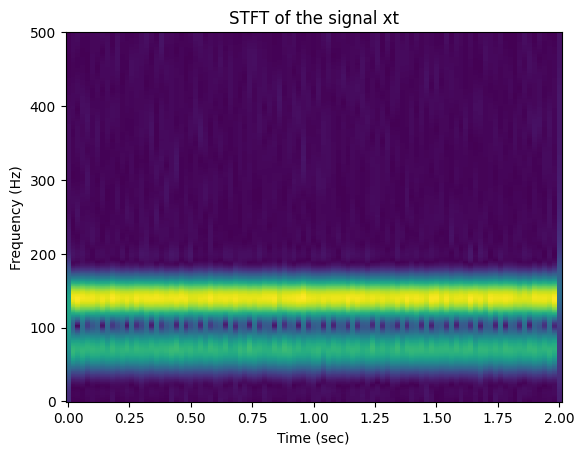

In [14]:
time = np.linspace(0, 2, 101)                
freq = np.linspace(0, 500, 513)                   #fs/2
plt.pcolormesh(time, freq, np.abs(X))
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.title("STFT of the signal xt")
plt.show()

In [15]:
#2.1.c
scale = np.power(2, np.linspace(1, 6, 100))       #5 octaves from 15.625 untill 500 (500 = 15.625 * 2 ^ 5)
coefs, freqs = pywt.cwt(xt, scale, "cmor3.0-1.0") #and 20 waves per octave => 100
print(coefs.shape)
print(freqs.shape)

(100, 2000)
(100,)


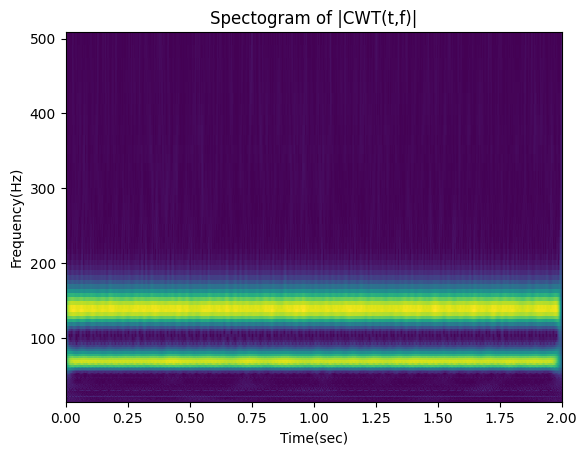

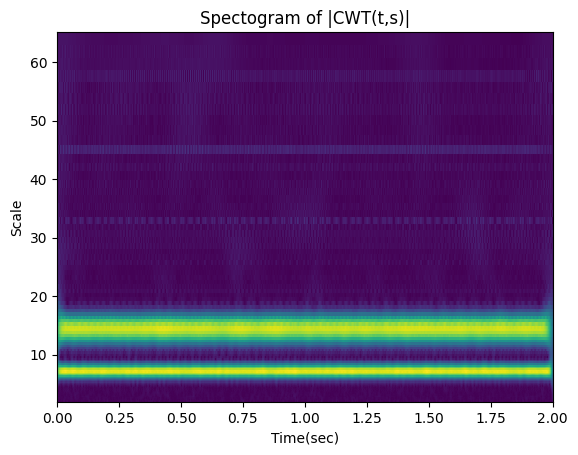

In [16]:
t = np.linspace(0, 2, 2000)                       #limit of t = 2000/fs = 2000/1000 = 2
f = freqs * 1000
plt.pcolormesh(t, f, np.abs(coefs))
plt.xlabel("Time(sec)")
plt.ylabel("Frequency(Hz)")
plt.title("Spectogram of |CWT(t,f)|")
plt.show()

plt.pcolormesh(t, scale, np.abs(coefs))
plt.xlabel("Time(sec)")
plt.ylabel("Scale")
plt.title("Spectogram of |CWT(t,s)|")
plt.show()

#2.1.d
#the analysis of the spectograph with use of CWT is better than STFT with the same content/drive/MyDrive/6th/DSP/data

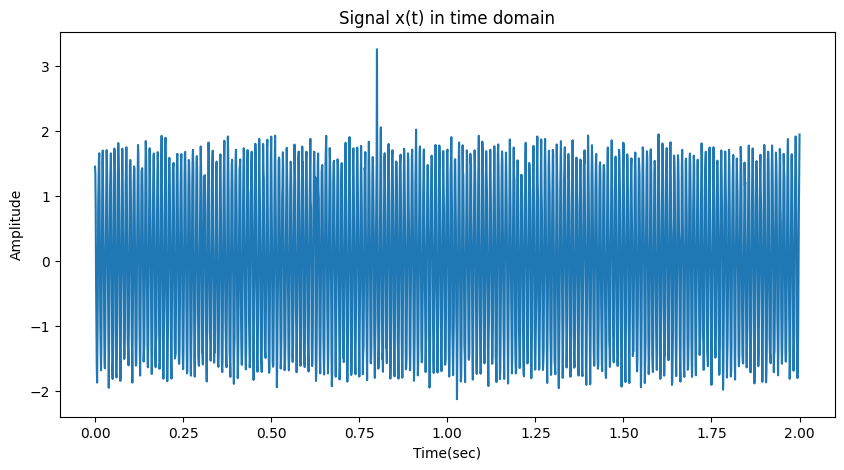

In [17]:
#2.2.a
#fs = 1000Hz, peaks at: 625 msec, 800 msec
vt = np.random.normal(0, 1, 2000)
xt = 1.7 * np.cos(2 * np.pi * 90 * t) + 0.15 * vt + 1.7 * (sp.signal.unit_impulse(2000, 625) + sp.signal.unit_impulse(2000, 800))
fig = plt.figure(figsize=(10,5))
plt.plot(t, xt)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")
plt.title("Signal x(t) in time domain")
plt.show()

In [18]:
#2.2.b
X = librosa.stft(xt, n_fft = 1024, hop_length = 20, win_length = 40)
print(X.shape)

(513, 101)


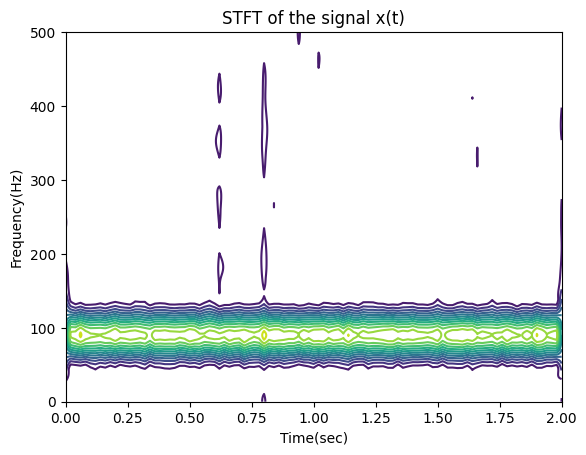

In [19]:
ff = np.linspace(0, 500, 513)
tt = np.linspace(0, 2, 101)

plt.contour(tt, ff, np.abs(X), 17)
plt.xlabel("Time(sec)")
plt.ylabel("Frequency(Hz)")
plt.title("STFT of the signal x(t)")
plt.show()

In [20]:
#2.2.c
scale = np.power(2, np.linspace(1, 6, 100))       #5 octaves from 15.625 untill 500 (500 = 15.625 * 2 ^ 5)
coefs, freqs = pywt.cwt(xt, scale, "cmor3.0-1.0") #and 20 waves per octave => 100
print(coefs.shape)                                #like the previous task

(100, 2000)


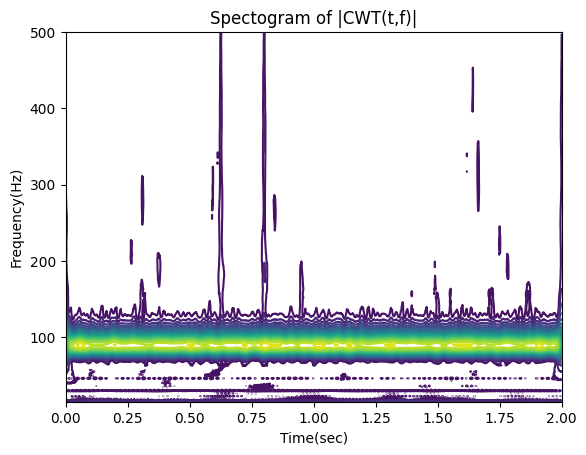

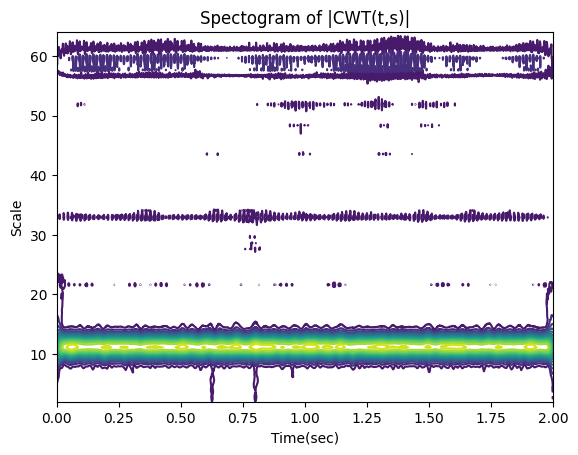

In [21]:
t = np.linspace(0, 2, 2000)                       #limit of t = 2000/fs = 2000/1000 = 2
F = freqs * 1000
plt.contour(t, F, np.abs(coefs), 20)
plt.xlabel("Time(sec)")
plt.ylabel("Frequency(Hz)")
plt.title("Spectogram of |CWT(t,f)|")
plt.show()

plt.contour(t, scale, np.abs(coefs), 15)
plt.xlabel("Time(sec)")
plt.ylabel("Scale")
plt.title("Spectogram of |CWT(t,s)|")
plt.show()

In [22]:
#Άσκηση 3η

#3.1
fs = np.zeros(2)
VoiceSignal, fs[0] = librosa.load('./drive/MyDrive/6th/DSP/data/speech_utterance.wav', 16000)
print (VoiceSignal.shape)

(72609,)


<ipython-input-22-876e8d4e1765>:5: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  VoiceSignal, fs[0] = librosa.load('./drive/MyDrive/6th/DSP/data/speech_utterance.wav', 16000)


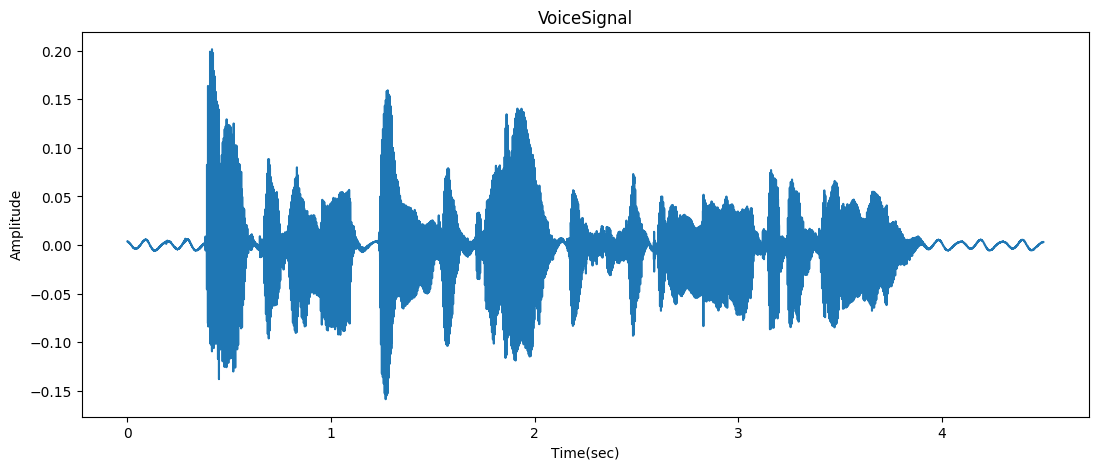

In [23]:
n = np.linspace(0, 4.5, 72609)
fig = plt.figure(figsize=(13,5))
plt.plot(n ,VoiceSignal)
plt.xlabel("Τime(sec)")
plt.ylabel("Amplitude")
plt.title("VoiceSignal")
plt.show()

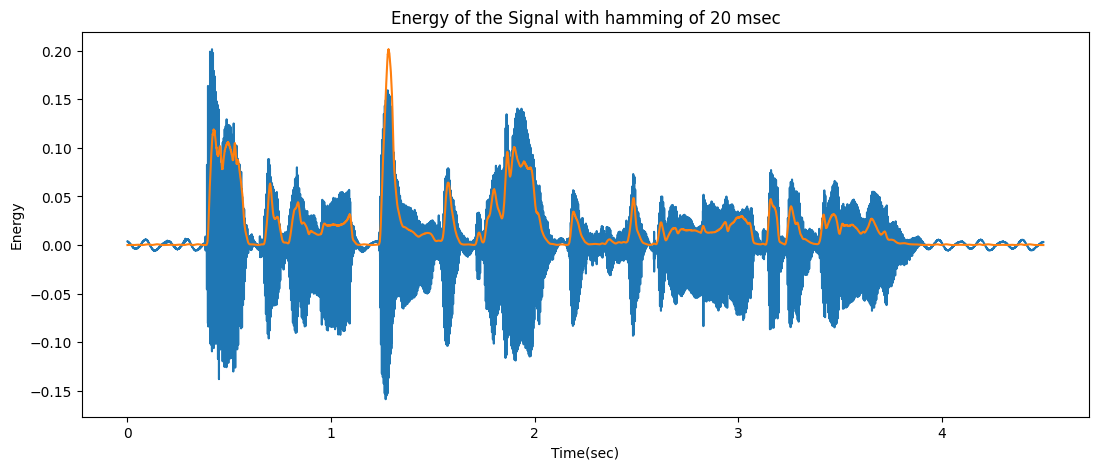

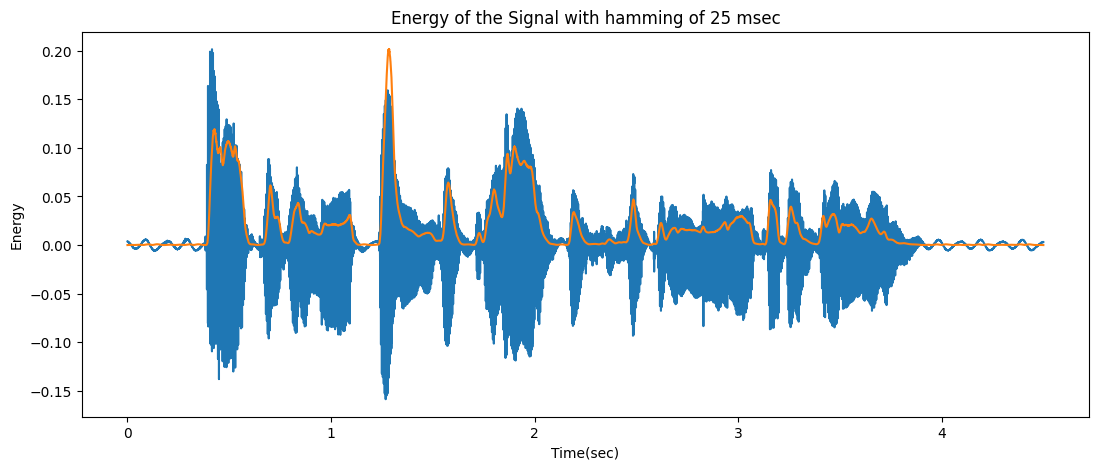

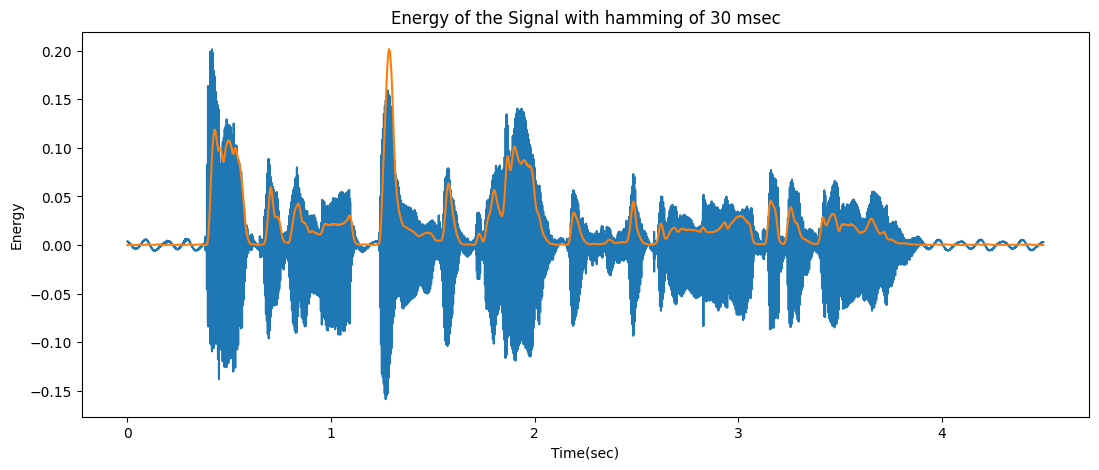

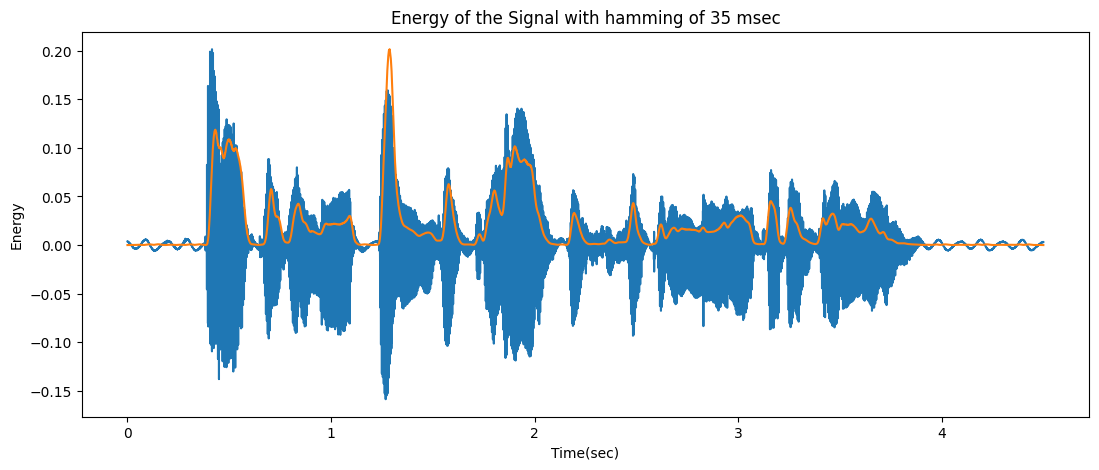

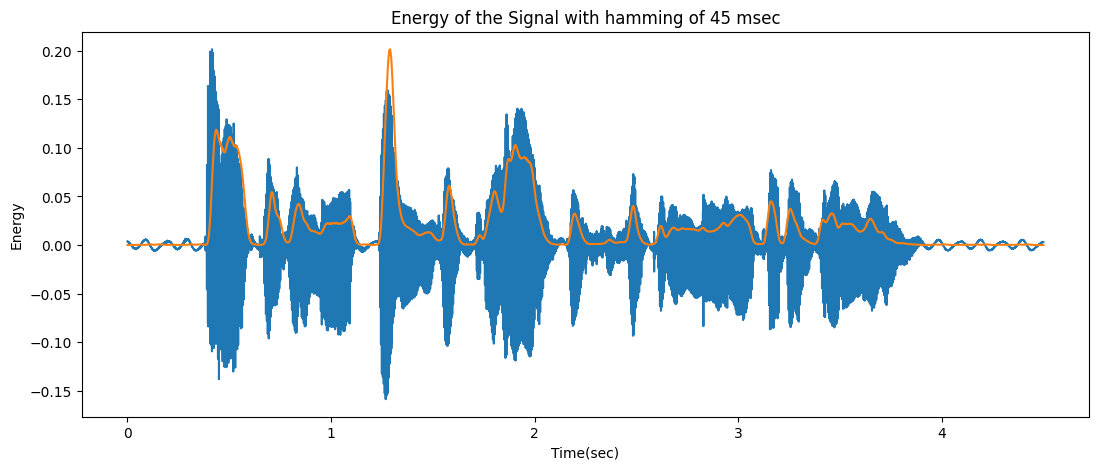

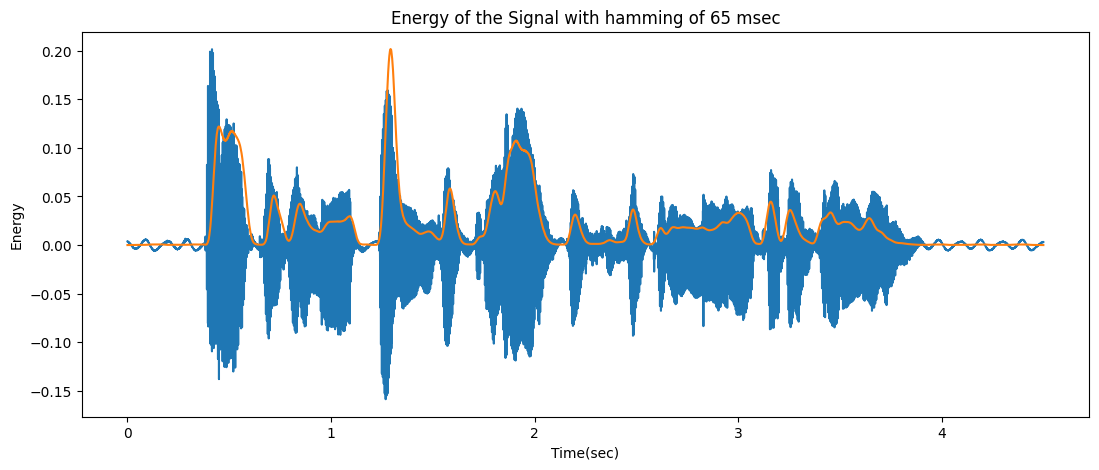

In [24]:
#Computation of the "Short Time Energy of the speech_utterance.wav"
window_duration = [0.020, 0.025, 0.03, 0.035, 0.045, 0.065]

def energy (window, fs, signal):
    samples = window * fs
    samples = int(samples)
    ham = np.hamming(samples)
    Energy = np.convolve(signal*signal, ham)
    shape = Energy.shape
    shape = shape[0]
    return Energy, shape

for i in range(0, 6):
    n = np.linspace(0, 4.5, 72609)
    fig = plt.figure(figsize=(13,5))
    plt.plot(n ,VoiceSignal)
    Energy, samples= energy(window_duration[i], fs[0], VoiceSignal)
    Energy = Energy / (max(Energy)/max(VoiceSignal))                #divide with the ratio of (max(Energy1)/max(VoiceSignal) 
    nn = np.linspace(0, 4.5, samples)  
                                                                    #in order to make a good enough analogy with the signal 
    plt.plot(nn, Energy)
    plt.xlabel("Time(sec)")
    plt.ylabel("Energy")
    plt.title("Energy of the Signal with hamming of %d msec" %(window_duration[i] * 1000))
    plt.show()

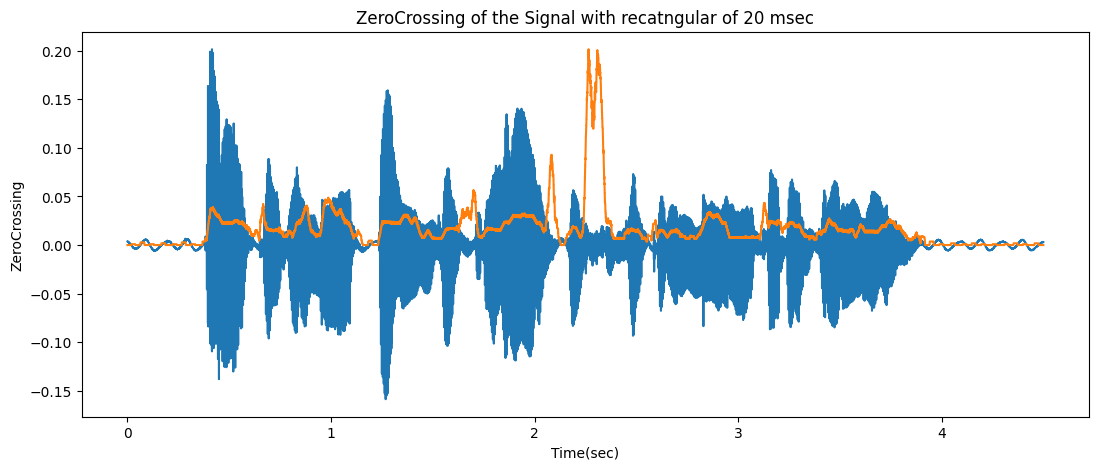

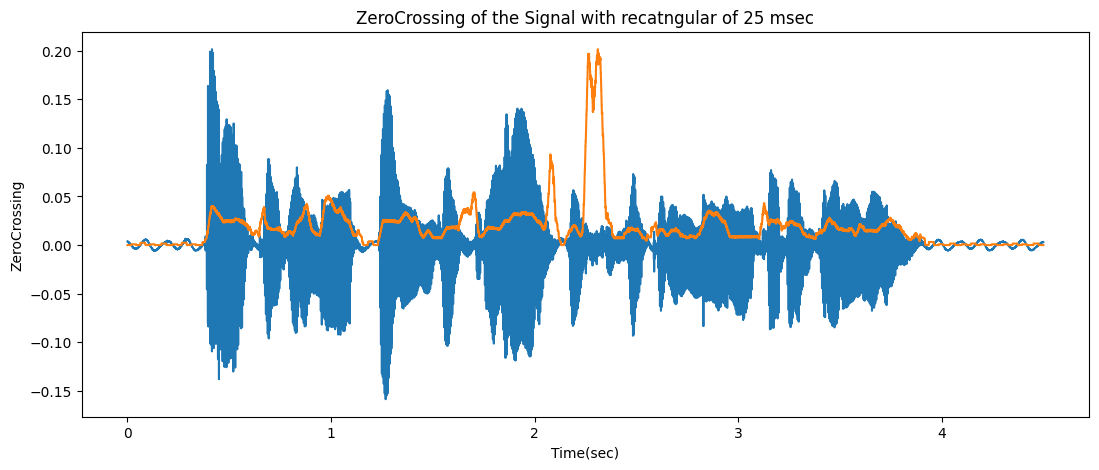

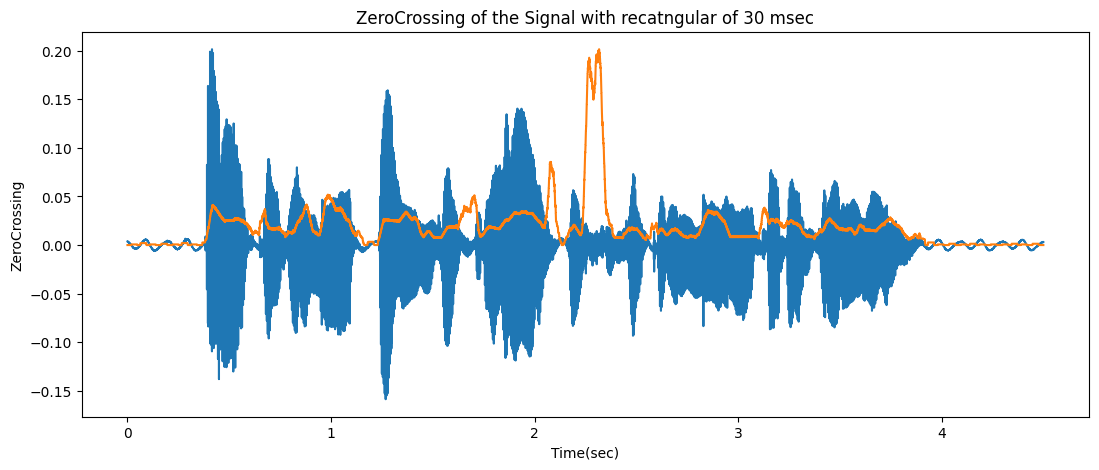

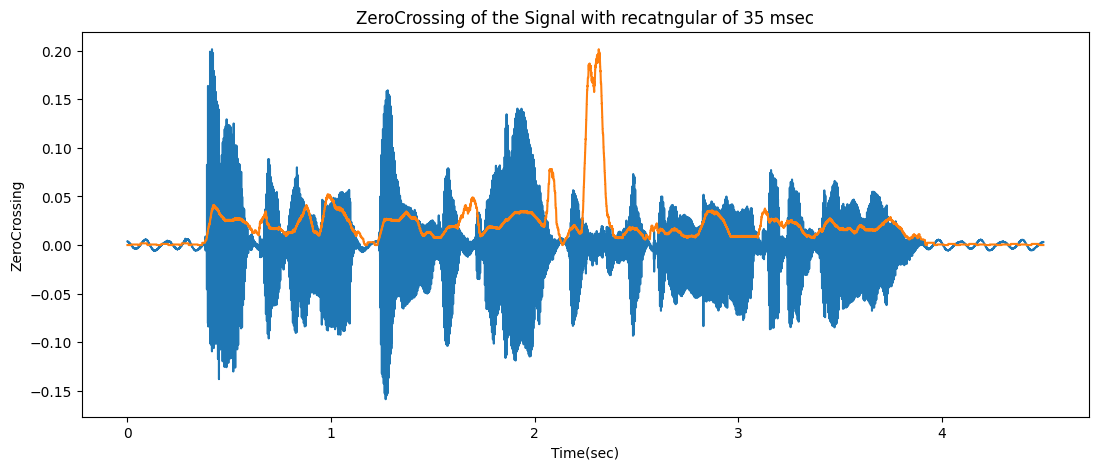

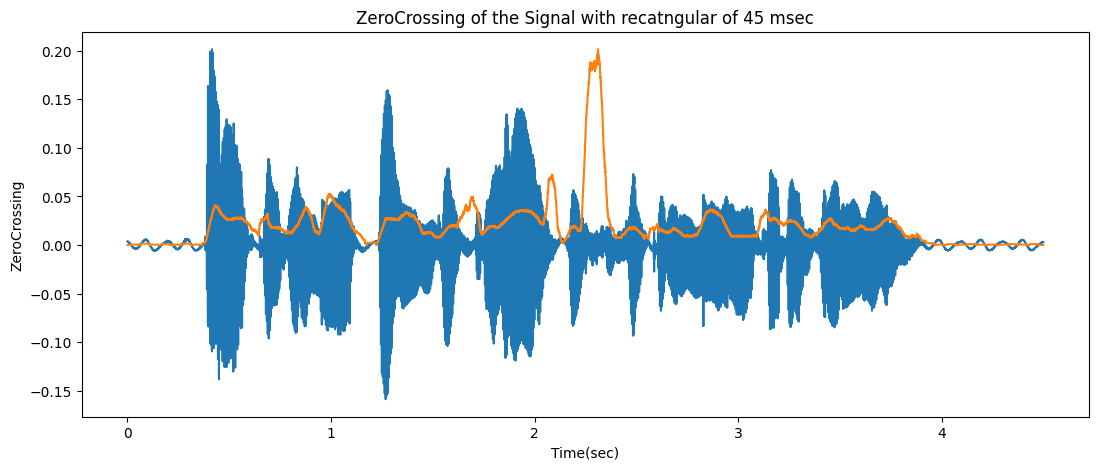

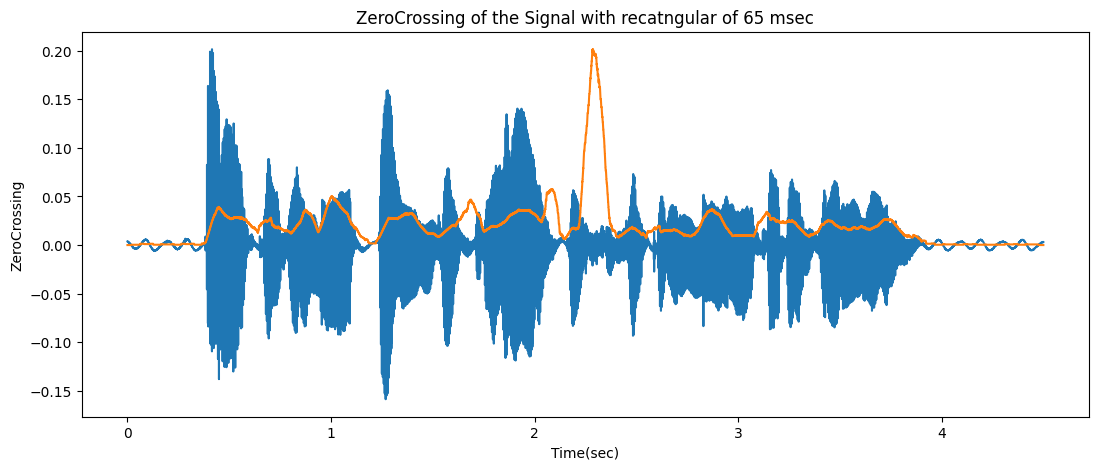

In [25]:
#Computation of "Zero-Crossing of the speech_utterance.wav"
#ZC = Zero-Crossing

def zerocrossing(window, fs, signal):
    samples = window * fs
    samples = int(samples)
    amplitude = 1 / 2 / samples
    rec = amplitude * sp.signal.boxcar(samples)
    ZC = np.convolve(np.abs(np.sign(signal[1:len(signal)]) - np.sign(signal[0:len(signal) - 1])), rec)
    shape = ZC.shape
    shape = shape[0]
    return ZC, shape

for i in range(0, 6):
    n = np.linspace(0, 4.5, 72609)
    fig = plt.figure(figsize=(13,5))
    plt.plot(n ,VoiceSignal)
    ZeroCrossing, samples = zerocrossing(window_duration[i], fs[0], VoiceSignal)
    ZeroCrossing = ZeroCrossing / (max(ZeroCrossing)/max(VoiceSignal))#divide with the ratio of (max(ZeroCrossing)/max(VoiceSignal) 
    nn = np.linspace(0, 4.5, samples)                               ##in order to make a good enough analogy with the signal 
    plt.plot(nn, ZeroCrossing)
    plt.xlabel("Time(sec)")
    plt.ylabel("ZeroCrossing")
    plt.title("ZeroCrossing of the Signal with recatngular of %d msec" %(window_duration[i] * 1000))
    plt.show()

In [26]:
#3.2
Voice_Signal, fs[1] = librosa.load('./drive/MyDrive/6th/DSP/data/music.wav', 44100)
print(fs[1])
print(Voice_Signal.shape)

<ipython-input-26-a425b81061dc>:2: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  Voice_Signal, fs[1] = librosa.load('./drive/MyDrive/6th/DSP/data/music.wav', 44100)


44100.0
(300002,)


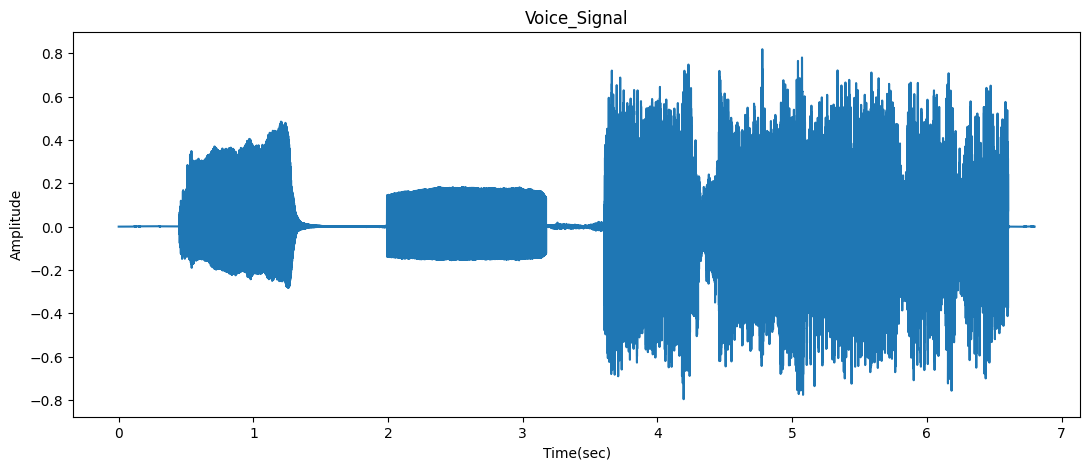

In [27]:
n = np.linspace(0, 6.8, 300002)
fig = plt.figure(figsize=(13,5))
plt.plot(n ,Voice_Signal)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")
plt.title("Voice_Signal")
plt.show()

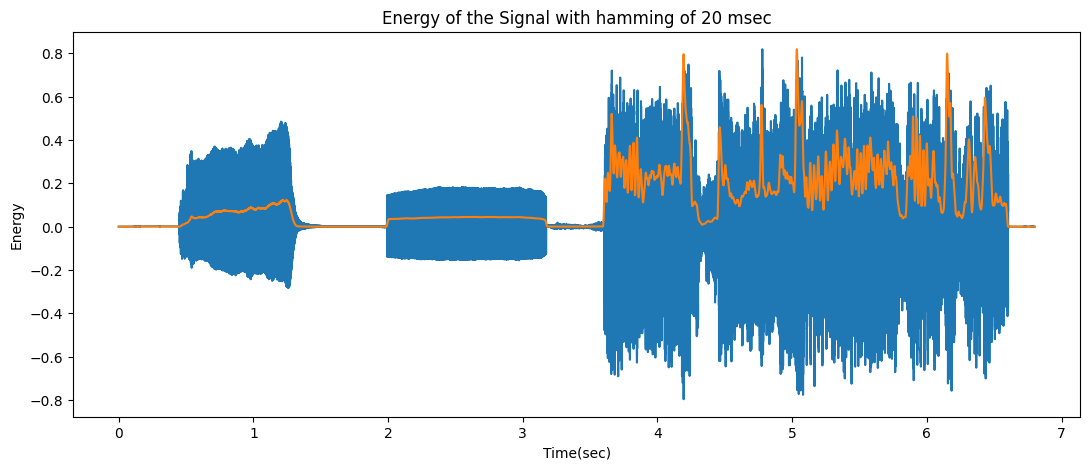

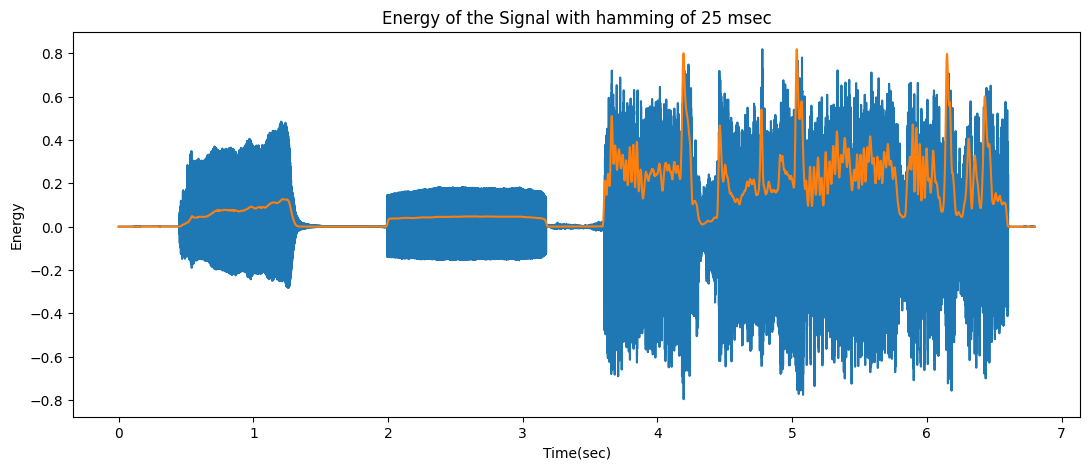

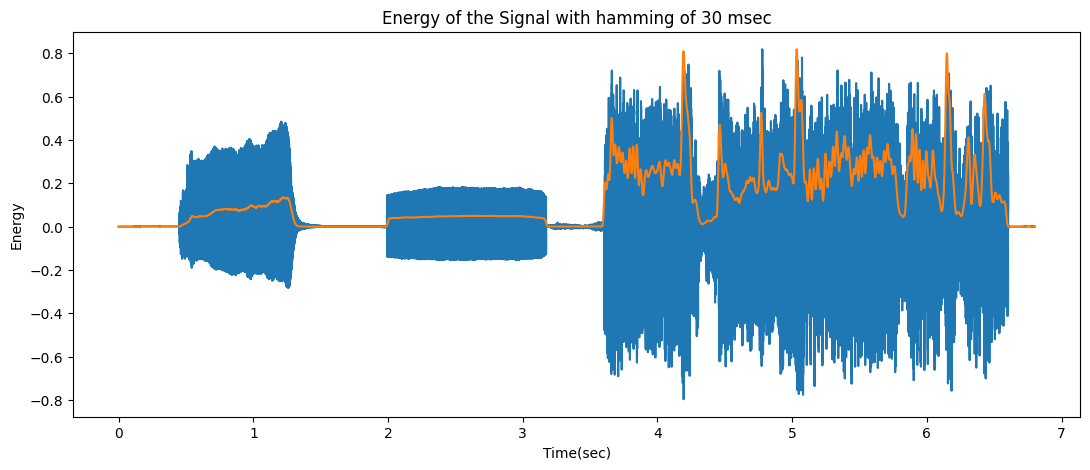

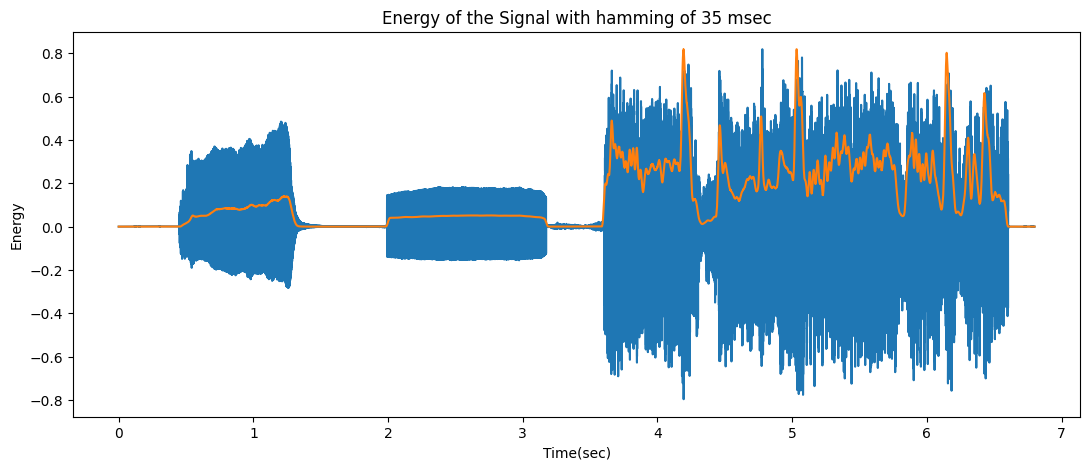

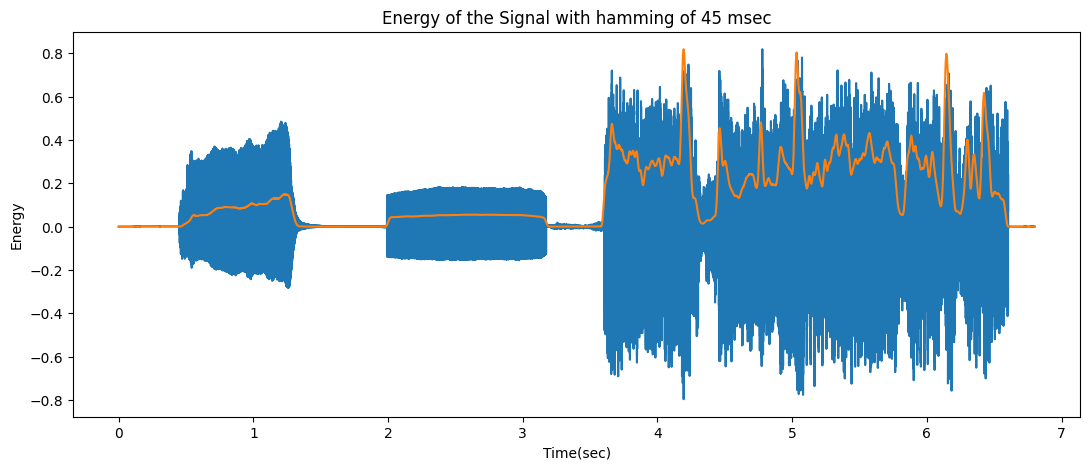

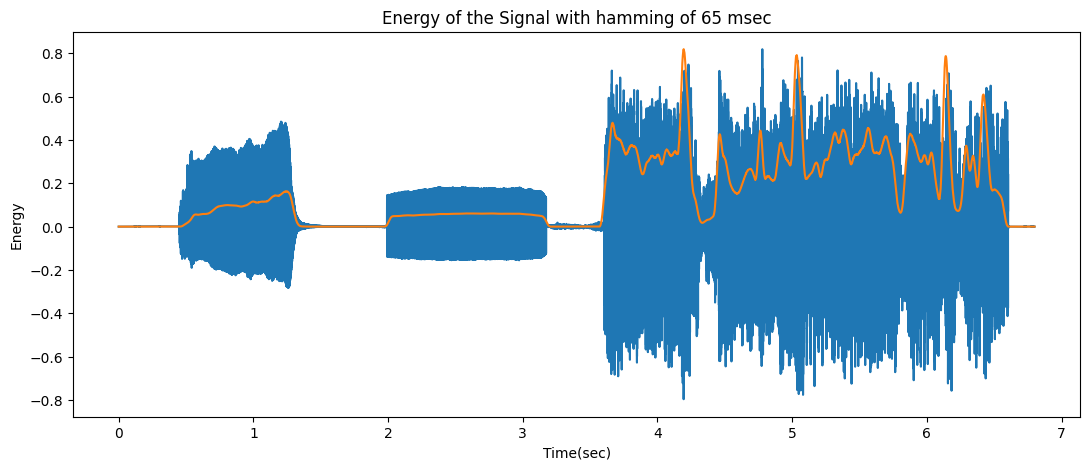

In [28]:
#Computation of the "Short Time Energy of the speech_utterance.wav"

for i in range(0, 6):
    n = np.linspace(0, 6.8, 300002)
    fig = plt.figure(figsize=(13,5))
    plt.plot(n ,Voice_Signal)
    Energy, samples= energy(window_duration[i], fs[1], Voice_Signal)
    Energy = Energy / (max(Energy)/max(Voice_Signal))                #divide with the ratio of (max(Energy)/max(Voice_Signal) 
    nn = np.linspace(0, 6.8, samples)                               ##in order to make a good enough analogy with the signal 
    plt.plot(nn, Energy)
    plt.xlabel("Time(sec)")
    plt.ylabel("Energy")
    plt.title("Energy of the Signal with hamming of %d msec" %(window_duration[i] * 1000))
    plt.show()

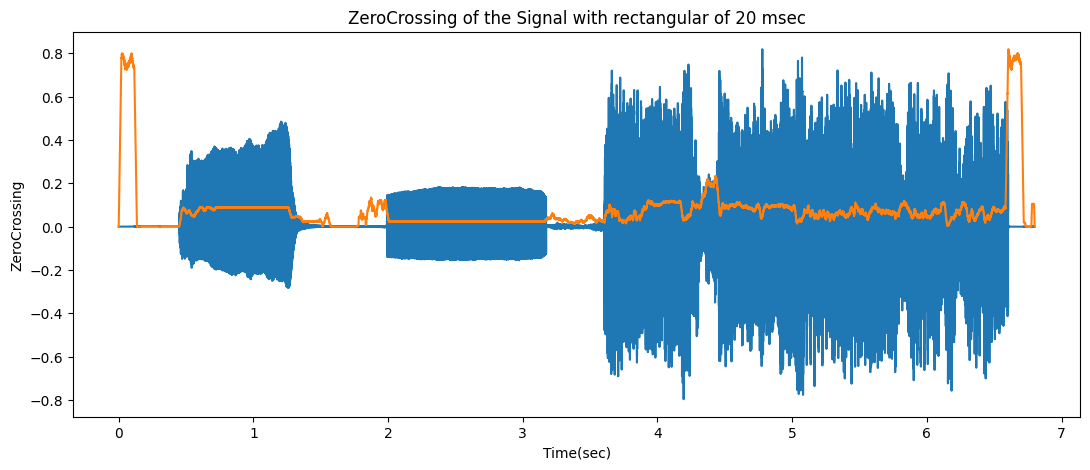

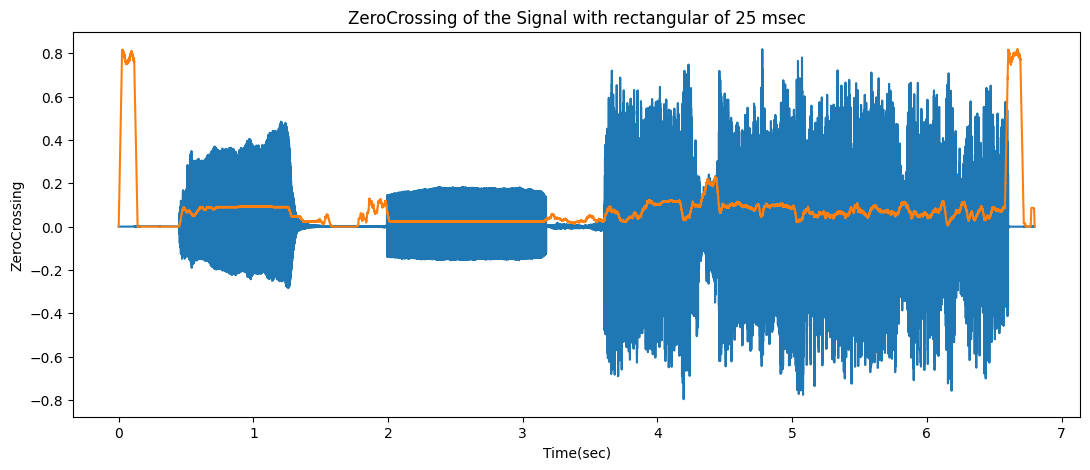

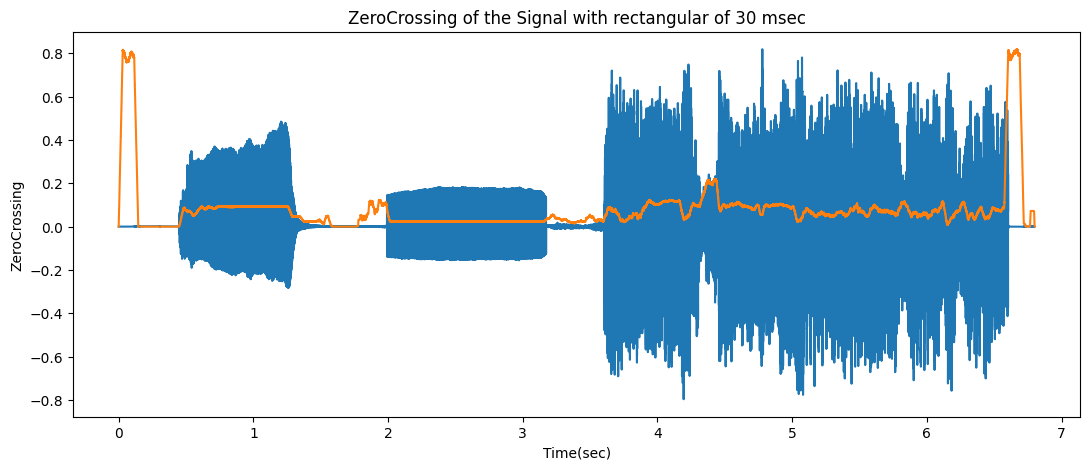

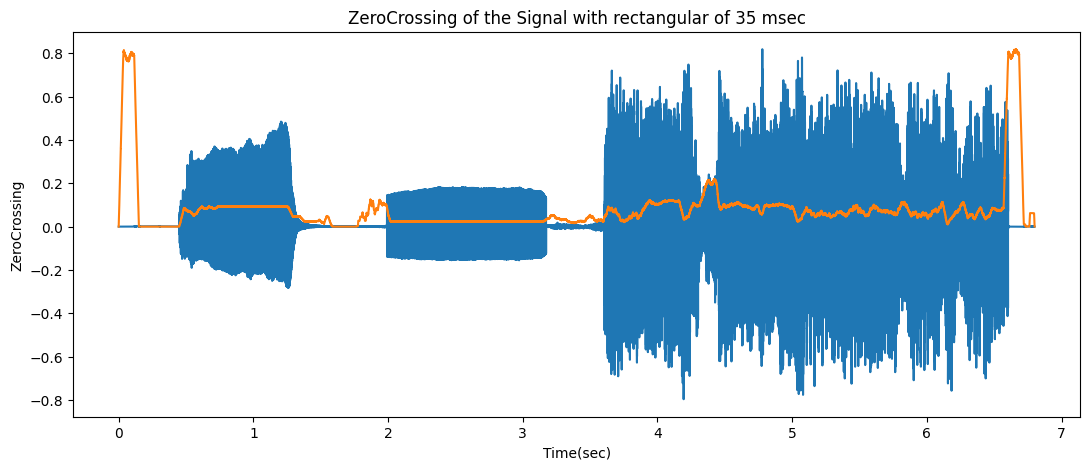

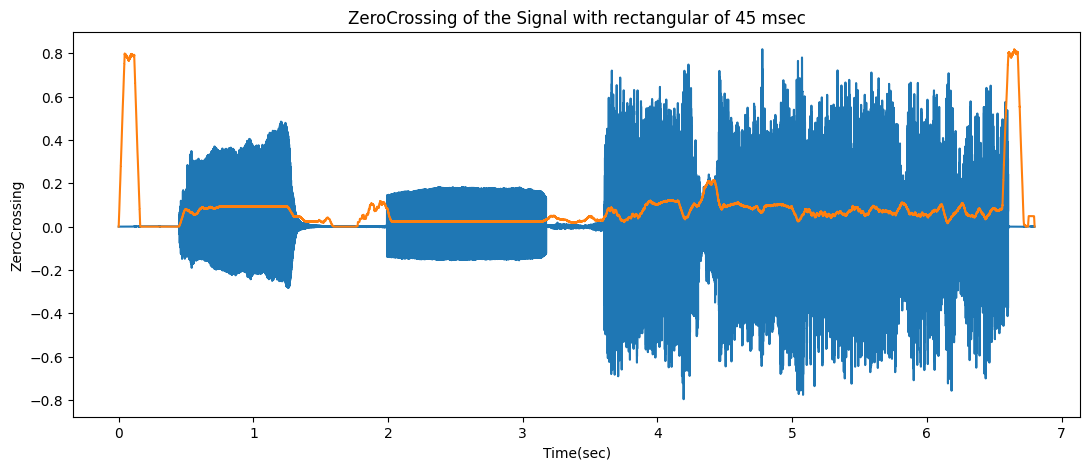

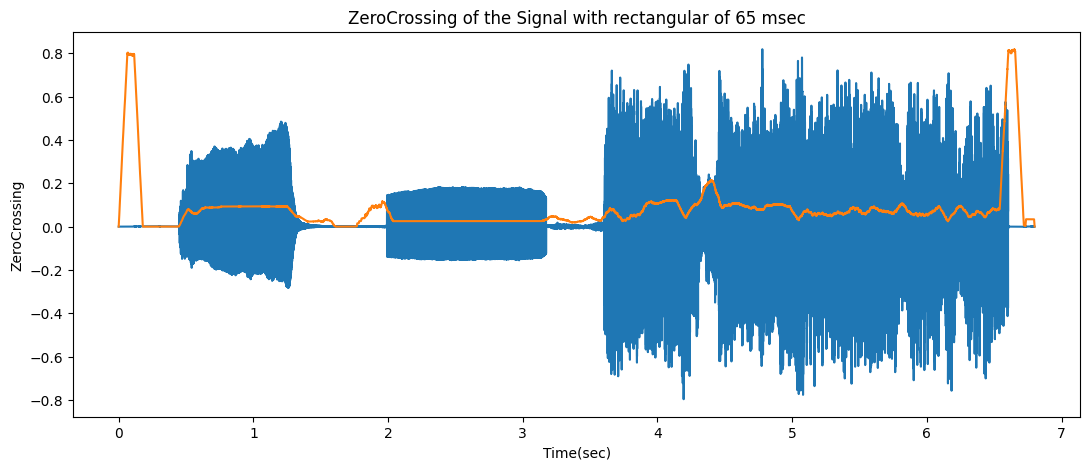

In [29]:
#Computation of "Zero-Crossing of the speech_utterance.wav"
#ZC = Zero-Crossing

for i in range(0, 6):
    n = np.linspace(0, 6.8, 300002)
    fig = plt.figure(figsize=(13,5))
    plt.plot(n ,Voice_Signal)
    ZeroCrossing, samples = zerocrossing(window_duration[i], fs[1], Voice_Signal)
    ZeroCrossing = ZeroCrossing / (max(ZeroCrossing)/max(Voice_Signal))#divide with the ratio of (max(ZeroCrossing)/max(Voice_Signal) 
    nn = np.linspace(0, 6.8, samples)                               ##in order to make a good enough analogy with the signal 
    plt.plot(nn, ZeroCrossing)
    plt.xlabel("Time(sec)")
    plt.ylabel("ZeroCrossing")
    plt.title("ZeroCrossing of the Signal with rectangular of %d msec" %(window_duration[i] * 1000))
    plt.show()

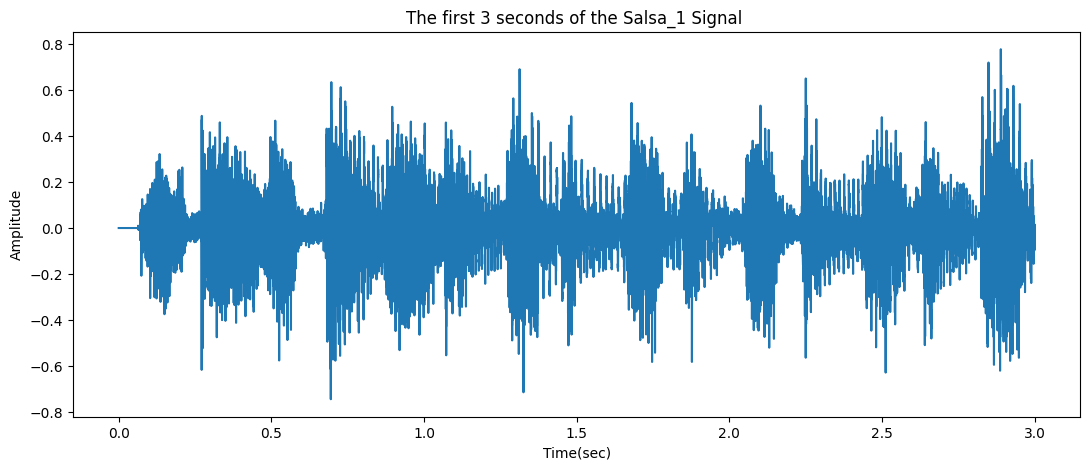

In [33]:
#Άσκση 4η

#4.1
signal, fs = librosa.load('./drive/MyDrive/6th/DSP/data/salsa_excerpt1.mp3')
salsa = signal[0:65536]
n = np.linspace(0, 3, 65536)
fig = plt.figure(figsize=(13,5))
plt.plot(n, salsa)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")
plt.title("The first 3 seconds of the Salsa_1 Signal ")
plt.show()

In [34]:
#4.2
l = [0,0,0,0,0,0,0,0]
print(len(l))
buf = salsa
for i in range(7):
    if(i == 6):
        ya, yd = pywt.dwt(buf, 'db4', mode = 'per')
        ya = ya / np.sqrt(2) 
        yd = yd / np.sqrt(2)
        l[i] = yd
        l[i + 1] = ya
        print(ya.shape)
        print(yd.shape)
        break
    ya, yd = pywt.dwt(buf, 'db4', mode = 'per')
    ya = ya / np.sqrt(2) 
    yd = yd / np.sqrt(2)
    l[i] = yd
    buf = ya
    print(yd.shape)

8
(32768,)
(16384,)
(8192,)
(4096,)
(2048,)
(1024,)
(512,)
(512,)


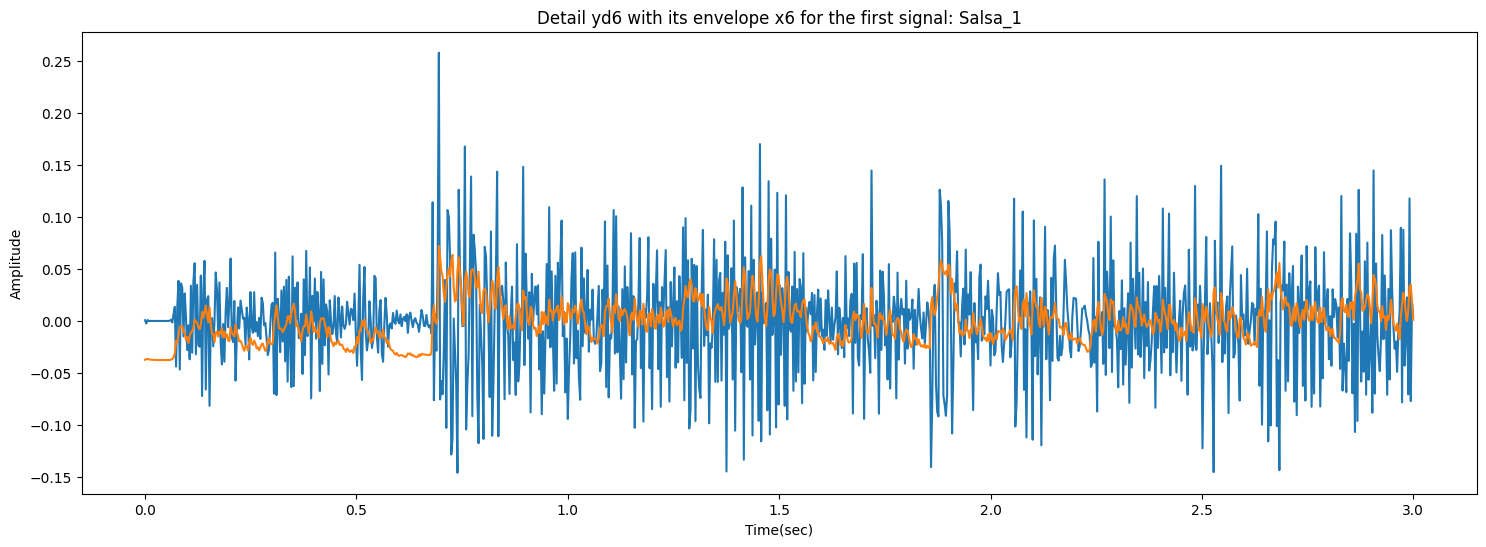

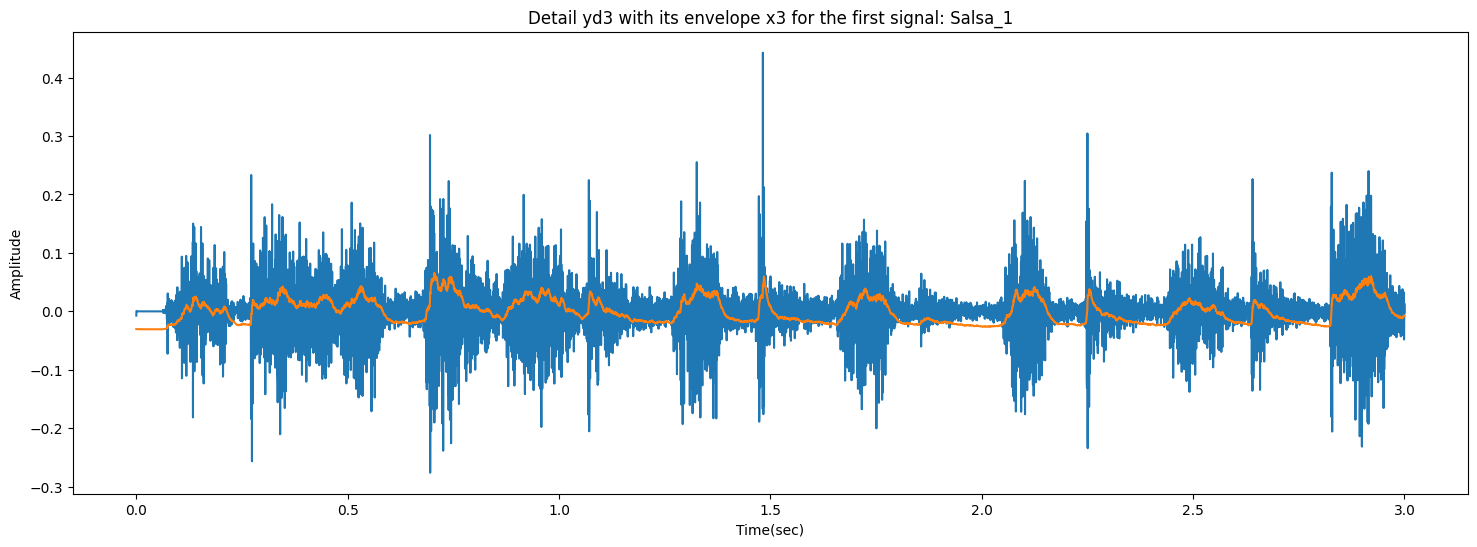

In [35]:
# 4.3
#a)Absolute Value
za7 = np.abs(l[7]) #ya7
z1 = np.abs(l[0])  #yd1
z2 = np.abs(l[1])  #yd2
z3 = np.abs(l[2])  #yd3 
z4 = np.abs(l[3])  #yd4
z5 = np.abs(l[4])  #yd5
z6 = np.abs(l[5])  #yd6
z7 = np.abs(l[6])  #yd7

#b)Bandpass Filtering
#c)Centering the envelope

#a0 = 0.001
#a0 = 0.002
a0 = 0.005
a = np.zeros(8)
for i in range(1,8,1):
    a[i] = a0 * np.power(2,i) 
    
def lfilter (a, z):
    x = sp.signal.lfilter([a,0,0,0,0,0], [1,(a - 1),0,0,0,0], z)
    average_value = np.mean(x)
    x = x - average_value
    return x
x1 = lfilter(a[1], z1)
x2 = lfilter(a[2], z2)
x3 = lfilter(a[3], z3)
x4 = lfilter(a[4], z4)
x5 = lfilter(a[5], z5)
x6 = lfilter(a[6], z6)
x7 = lfilter(a[7], z7)
xa7 = lfilter(a[7], za7)

#Ploting

n6 = np.linspace(0,3, 1024)
fig = plt.figure(figsize=(18,6))
plt.plot(n6, l[5])     #l[5] = yd6
plt.plot(n6, x6)
plt.title("Detail yd6 with its envelope x6 for the first signal: Salsa_1")
plt.ylabel("Amplitude")
plt.xlabel("Time(sec)")
plt.show()


n3 = np.linspace(0,3, 8192)
fig = plt.figure(figsize=(18,6))
plt.plot(n3, l[2])    #l[2] = yd3
plt.plot(n3, x3)
plt.title("Detail yd3 with its envelope x3 for the first signal: Salsa_1")
plt.ylabel("Amplitude")
plt.xlabel("Time(sec)")
plt.show()

(16384,)


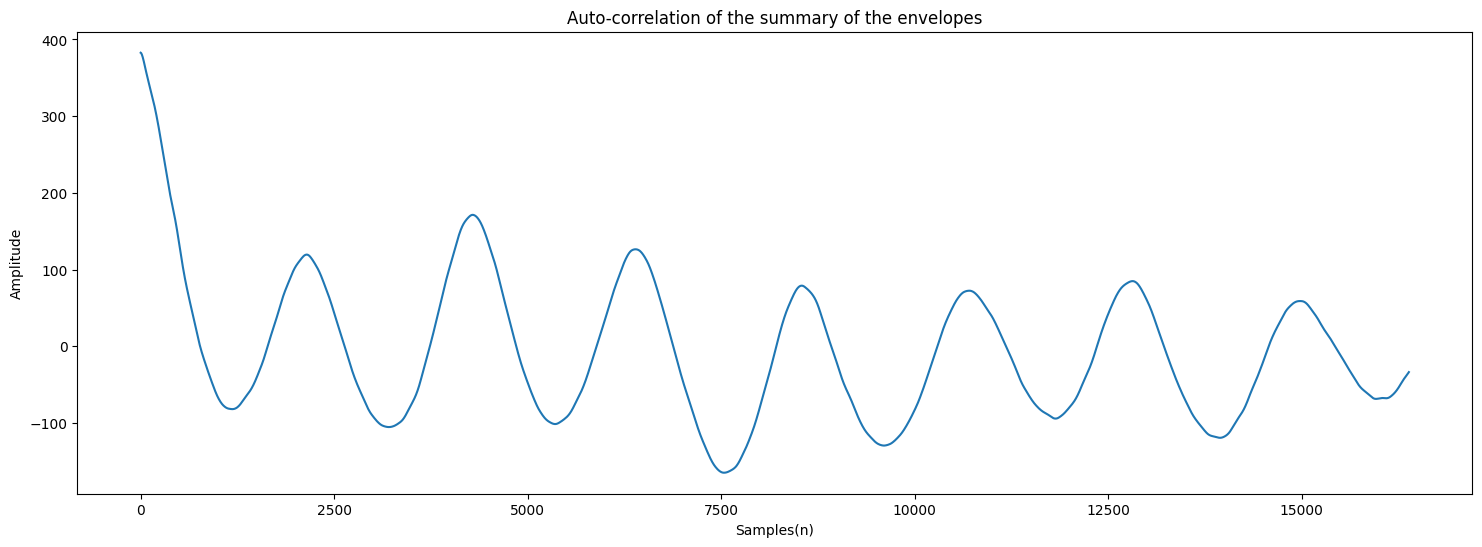

[382.72135562 382.68809743 382.63089301 ... -33.98801451 -33.82999648
 -33.6703893 ]


In [36]:
#4.4
xi = [x1,x2,x3,x4,x5,x6,x7,xa7]


def interpolation(x,level):
    y = 1/pow(2,(level - 1))
    result = np.interp(np.arange(0, len(x), y), np.arange(0, len(x)), x)
    return result

perivSum = xi[0]+interpolation(xi[1],2)+interpolation(xi[2],3)+interpolation(xi[3],4)+interpolation(xi[4],5)+interpolation(xi[5],6)+interpolation(xi[6],7)+interpolation(xi[7],7)

def autocorr(x):
    result = np.correlate(x, x, mode = 'same')
    return result[result.size//2:]



autocorrelation = autocorr(perivSum)
print(autocorrelation.shape)
fig = plt.figure(figsize=(18,6))
n = np.linspace(0,len(autocorrelation), len(autocorrelation))
plt.xlabel("Samples(n)")
plt.ylabel("Amplitude")
plt.title("Auto-correlation of the summary of the envelopes")
plt.plot(n, autocorrelation)
plt.show()
print(autocorrelation)

[ 2138  4286  6396  8556 10700 12792 14971]


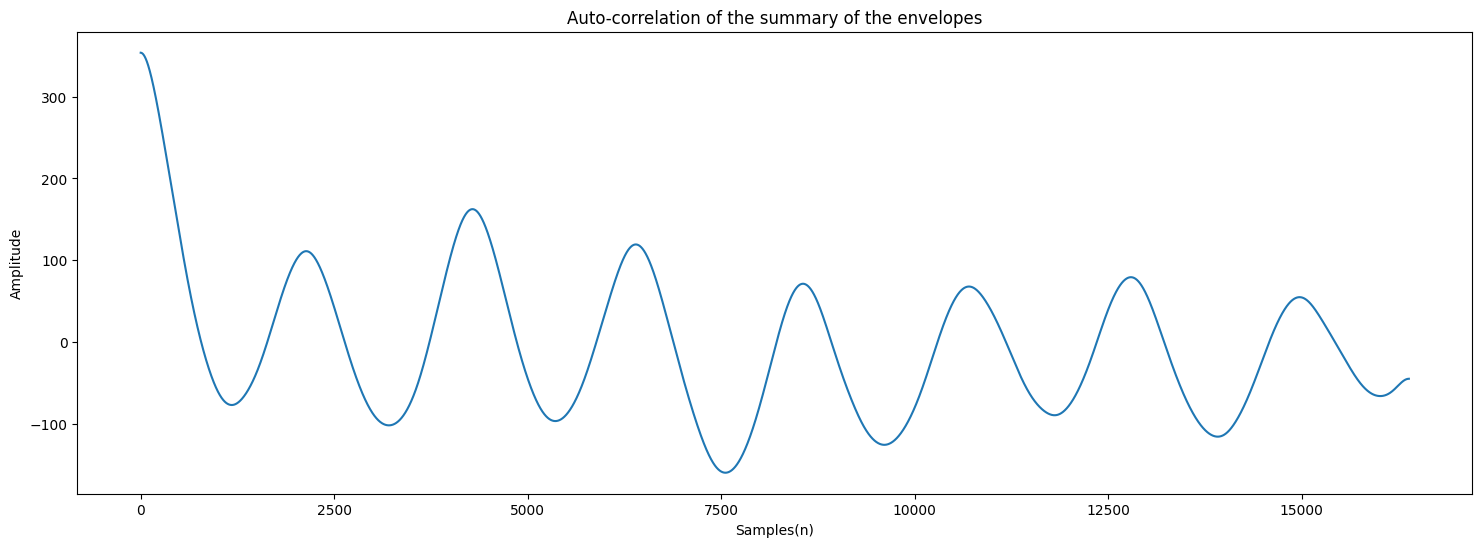

BPM of Salsa_1 =  154


In [37]:
#4.5
#Computation of BPM
autocor_gau = sp.ndimage.gaussian_filter1d(autocorrelation, 100)
peaks = sp.signal.argrelextrema(autocor_gau, np.greater)
peaks = peaks[0]
print(peaks)
fig = plt.figure(figsize=(18,6))
n = np.linspace(0,len(autocorrelation), len(autocorrelation))
plt.xlabel("Samples(n)")
plt.ylabel("Amplitude")
plt.title("Auto-correlation of the summary of the envelopes")
plt.plot(n, autocor_gau)
plt.show()

diffs = np.diff(peaks)
tp = 60*22050/4/diffs           #we divide with 4 because if we use the function np.correlate()
                              # with mode = same we receive the result of autocorrelation with 2^14 samples
Bpm=sum(tp)/len(tp)
print("BPM of Salsa_1 = ",int(Bpm))

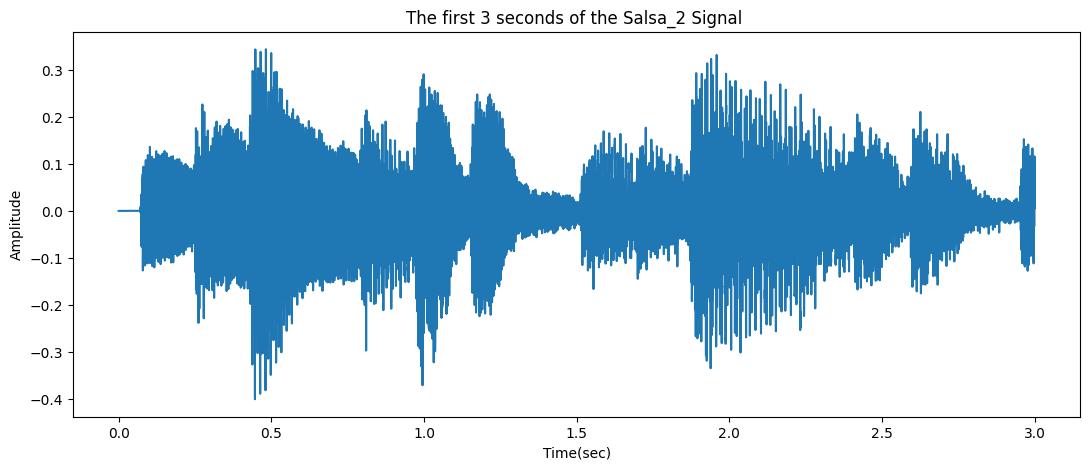

In [39]:
#4.6
#For the signal: “salsa excerpt2.mp3”

signal2, fs2 = librosa.load('./drive/MyDrive/6th/DSP/data/salsa_excerpt2.mp3')
salsa2 = signal2[0:65536]

n = np.linspace(0, 3, 65536)
fig = plt.figure(figsize=(13,5))
plt.plot(n, salsa2)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")
plt.title("The first 3 seconds of the Salsa_2 Signal ")
plt.show()

In [40]:
#4.2 
#For the signal: “salsa excerpt2.mp3”
l2 = [0,0,0,0,0,0,0,0]
print(len(l2))
buf2 = salsa2
for i in range(7):
    if(i == 6):
        y2a, y2d = pywt.dwt(buf2, 'db4', mode = 'per')
        y2a = y2a / np.sqrt(2) 
        y2d = y2d / np.sqrt(2)
        l2[i] = y2d
        l2[i + 1] = y2a
        print(y2a.shape)
        print(y2d.shape)
        break
    y2a, y2d = pywt.dwt(buf2, 'db4', mode = 'per')
    y2a = y2a / np.sqrt(2) 
    y2d = y2d / np.sqrt(2)
    l2[i] = y2d
    buf2 = y2a
    print(y2d.shape)

8
(32768,)
(16384,)
(8192,)
(4096,)
(2048,)
(1024,)
(512,)
(512,)


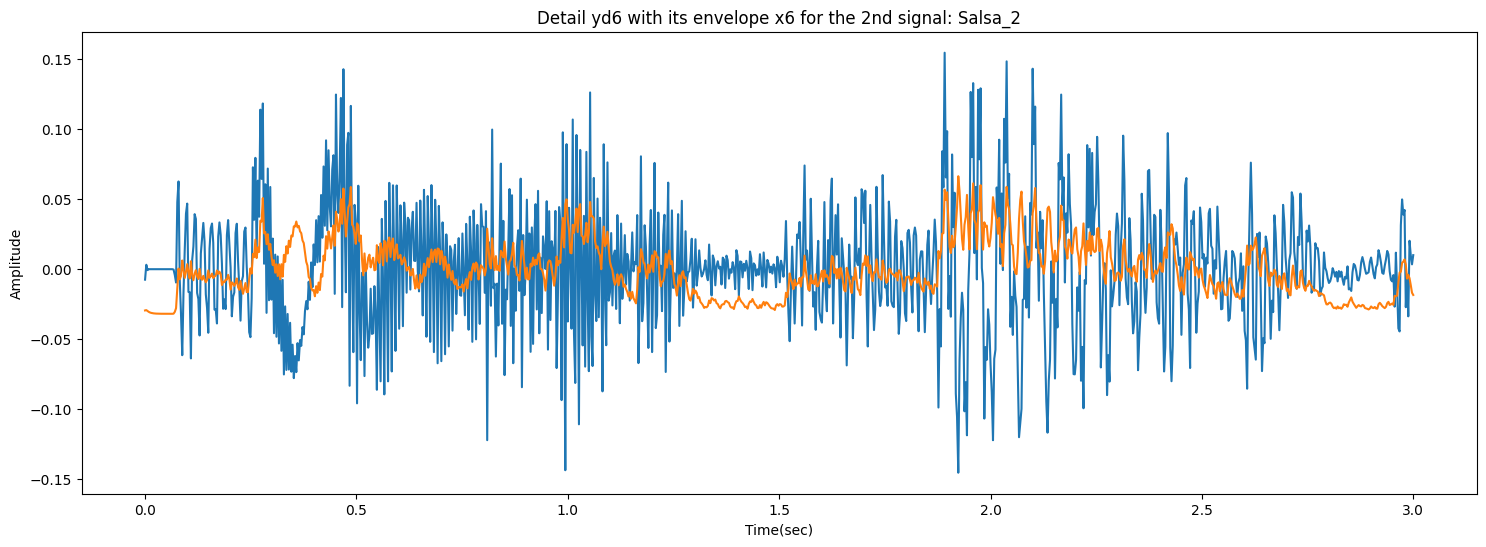

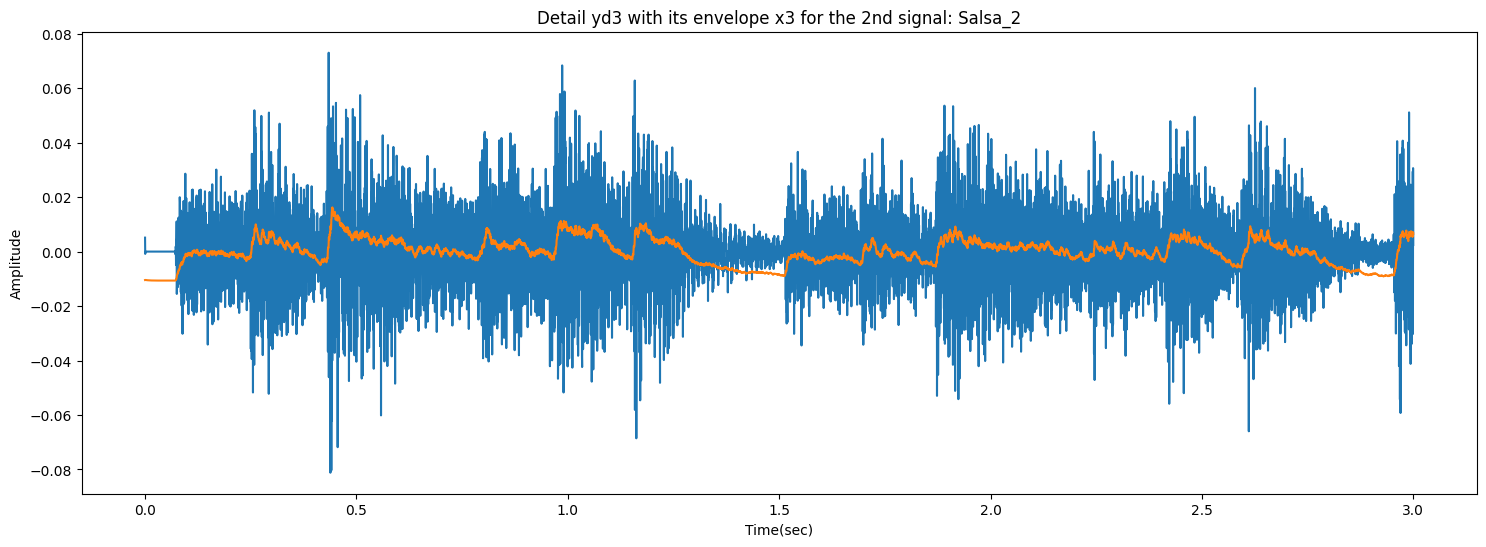

In [41]:
# 4.3
#For the signal: “salsa excerpt2.mp3”

#a)Absolute Value
z2a7 = np.abs(l2[7]) #y2a7
z21 = np.abs(l2[0])  #y2d1
z22 = np.abs(l2[1])  #y2d2
z23 = np.abs(l2[2])  #y2d3 
z24 = np.abs(l2[3])  #y2d4
z25 = np.abs(l2[4])  #y2d5
z26 = np.abs(l2[5])  #y2d6
z27 = np.abs(l2[6])  #y2d7

#b)Bandpass Filtering
#c)Centering the envelope

x21 = lfilter(a[1], z21)
x22 = lfilter(a[2], z22)
x23 = lfilter(a[3], z23)
x24 = lfilter(a[4], z24)
x25 = lfilter(a[5], z25)
x26 = lfilter(a[6], z26)
x27 = lfilter(a[7], z27)
x2a7 = lfilter(a[7], z2a7)

#Ploting

n26 = np.linspace(0,3, 1024)
fig = plt.figure(figsize=(18,6))
plt.plot(n26, l2[5])     #l2[5] = y2d6
plt.plot(n26, x26)
plt.title("Detail yd6 with its envelope x6 for the 2nd signal: Salsa_2")
plt.ylabel("Amplitude")
plt.xlabel("Time(sec)")
plt.show()


n23 = np.linspace(0,3, 8192)
fig = plt.figure(figsize=(18,6))
plt.plot(n23, l2[2])    #l2[2] = y2d3
plt.plot(n23, x23)
plt.title("Detail yd3 with its envelope x3 for the 2nd signal: Salsa_2")
plt.ylabel("Amplitude")
plt.xlabel("Time(sec)")
plt.show()

(16384,)


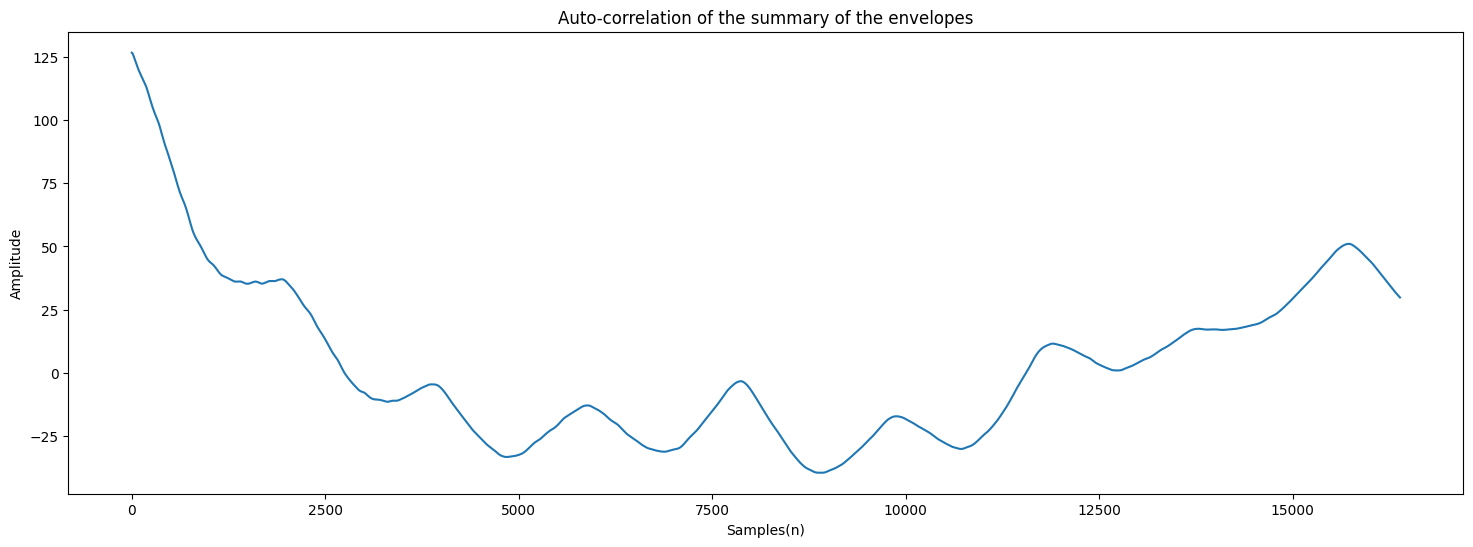

[126.6960861  126.68653248 126.670391   ...  29.8823886   29.84924197
  29.81602763]


In [42]:
#4.4
#For the signal: “salsa excerpt2.mp3”

x2i = [x21,x22,x23,x24,x25,x26,x27,x2a7]


perivSum2 = x2i[0]+interpolation(x2i[1],2)+interpolation(x2i[2],3)+interpolation(x2i[3],4)+interpolation(x2i[4],5)+interpolation(x2i[5],6)+interpolation(x2i[6],7)+interpolation(x2i[7],7)


autocorrelation2 = autocorr(perivSum2)
print(autocorrelation2.shape)
fig = plt.figure(figsize=(18,6))
n = np.linspace(0,len(autocorrelation2), len(autocorrelation2))
plt.xlabel("Samples(n)")
plt.ylabel("Amplitude")
plt.title("Auto-correlation of the summary of the envelopes")
plt.plot(n, autocorrelation2)
plt.show()
print(autocorrelation2)

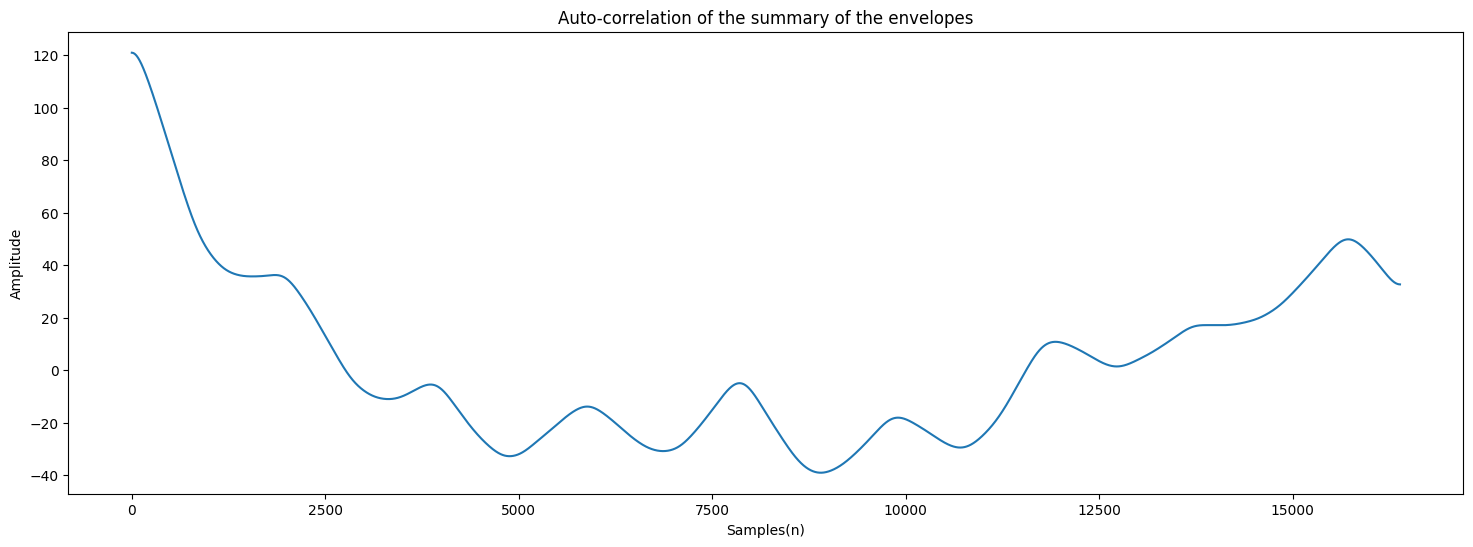

In [43]:
#we filter the signal with a gaussian filter to become more smooth

autocorr_gaussian_2 = sp.ndimage.gaussian_filter1d(autocorrelation2,100)
fig = plt.figure(figsize=(18,6))
n = np.linspace(0,len(autocorrelation2), len(autocorrelation2))
plt.xlabel("Samples(n)")
plt.ylabel("Amplitude")
plt.title("Auto-correlation of the summary of the envelopes")
plt.plot(n, autocorr_gaussian_2)
plt.show()

In [45]:
#4.5
#Computation of BPM
#For the signal: “salsa excerpt2.mp3”


peaks2 = sp.signal.argrelextrema(autocorr_gaussian_2, np.greater)
peaks2 = peaks2[0]
print(peaks2)

diffs2 = np.diff(peaks2)
tp2 = 60*22050/4/diffs2           #we divide with 4 because if we use the function np.correlate()
                              # with mode = same we receive the result of autocorrelation with 2^14 samples
Bpm2=sum(tp2)/len(tp2)
print("BPM of Salsa_2 = ",int(Bpm2))

[ 1849  3859  5883  7851  9898 11932 13880 15714]
BPM of Salsa_2 =  167


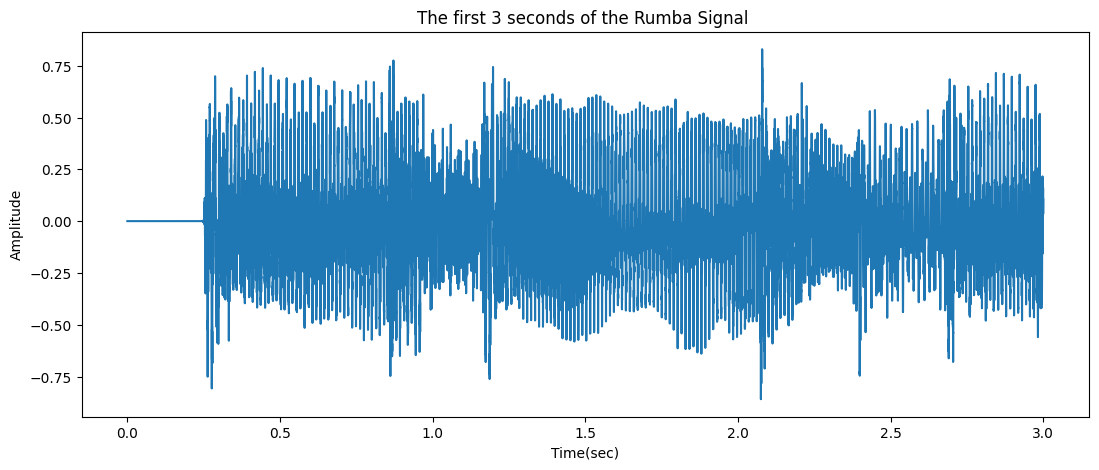

In [47]:
#4.6
#For the signal: “rumba_excerpt.mp3”

signal3, fs2 = librosa.load('./drive/MyDrive/6th/DSP/data/rumba_excerpt.mp3')
rumba = signal3[0:65536]

n3 = np.linspace(0, 3, 65536)
fig = plt.figure(figsize=(13,5))
plt.plot(n3, rumba)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")
plt.title("The first 3 seconds of the Rumba Signal ")
plt.show()

In [48]:
#4.2
#For the signal: “rumba_excerpt.mp3”

l3 = [0,0,0,0,0,0,0,0]
print(len(l3))
buf3 = rumba
for i in range(7):
    if(i == 6):
        y3a, y3d = pywt.dwt(buf3, 'db4', mode = 'per')
        y3a = y3a / np.sqrt(2) 
        y3d = y3d / np.sqrt(2)
        l3[i] = y3d
        l3[i + 1] = y3a
        print(y3a.shape)
        print(y3d.shape)
        break
    y3a, y3d = pywt.dwt(buf3, 'db4', mode = 'per')
    y3a = y3a / np.sqrt(2) 
    y3d = y3d / np.sqrt(2)
    l3[i] = y3d
    buf3 = y3a
    print(y3d.shape)

8
(32768,)
(16384,)
(8192,)
(4096,)
(2048,)
(1024,)
(512,)
(512,)


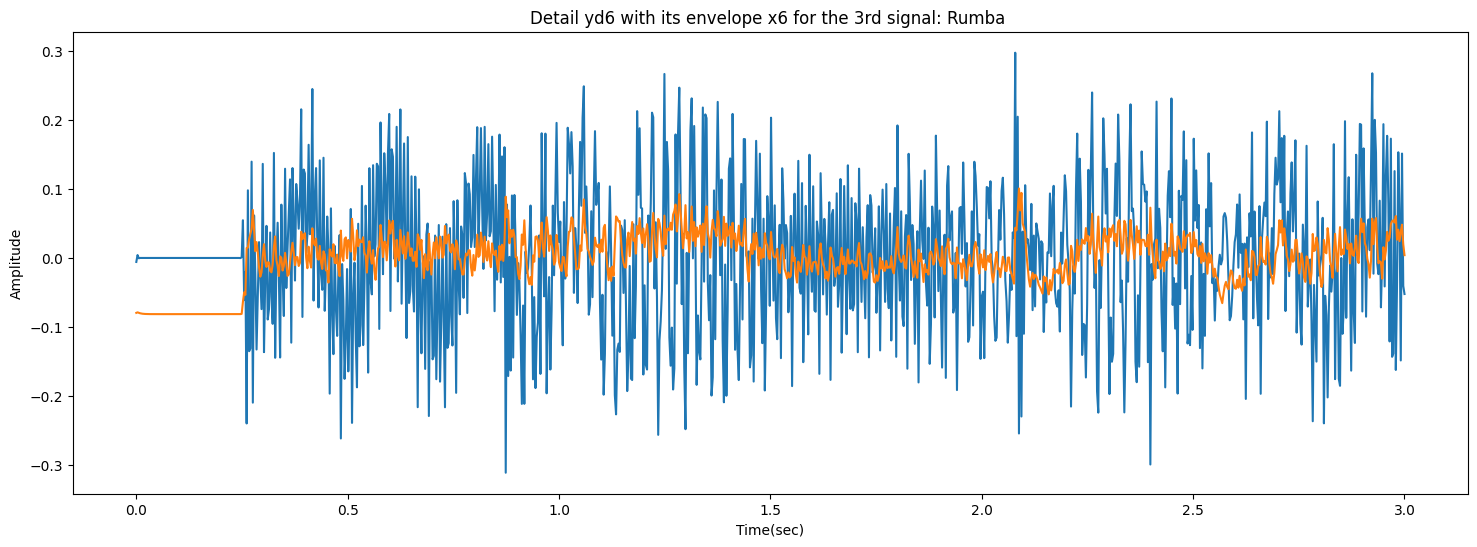

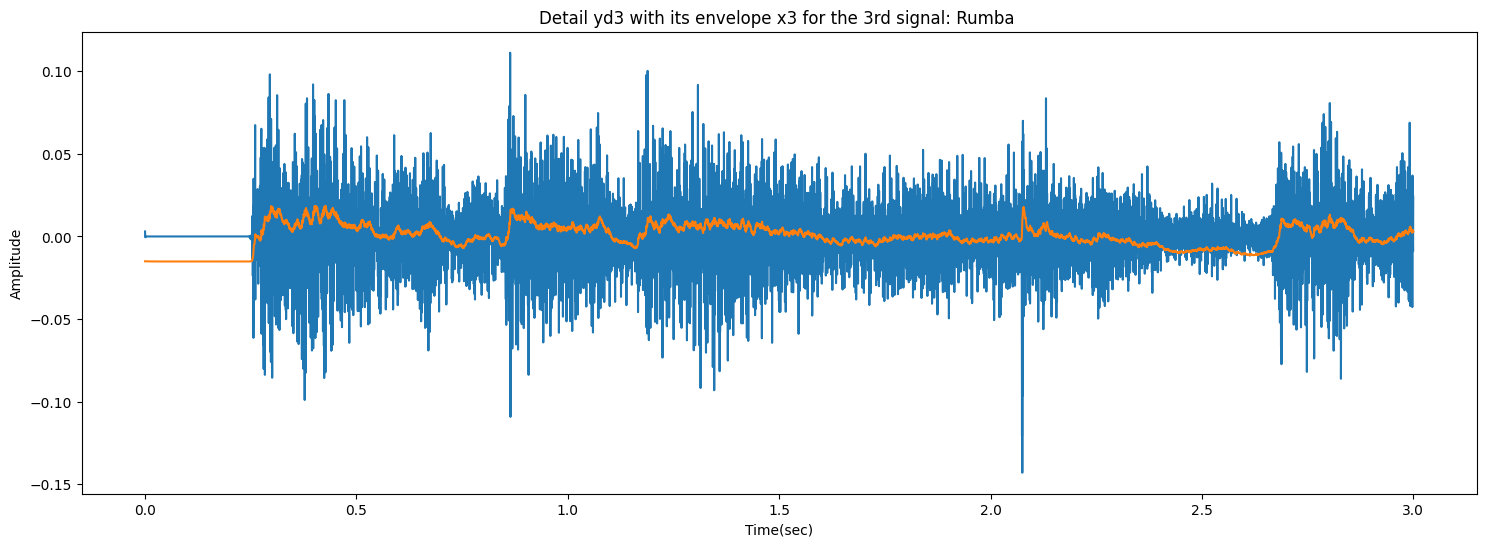

In [49]:
# 4.3
#For the signal: “rumba_excerpt.mp3”

#a)Absolute Value
z3a7 = np.abs(l3[7]) #y3a7
z31 = np.abs(l3[0])  #y3d1
z32 = np.abs(l3[1])  #y3d2
z33 = np.abs(l3[2])  #y3d3 
z34 = np.abs(l3[3])  #y3d4
z35 = np.abs(l3[4])  #y3d5
z36 = np.abs(l3[5])  #y3d6
z37 = np.abs(l3[6])  #y3d7

#b)Bandpass Filtering
#c)Centering the envelope

x31 = lfilter(a[1], z31)
x32 = lfilter(a[2], z32)
x33 = lfilter(a[3], z33)
x34 = lfilter(a[4], z34)
x35 = lfilter(a[5], z35)
x36 = lfilter(a[6], z36)
x37 = lfilter(a[7], z37)
x3a7 = lfilter(a[7], z3a7)

#Ploting

n36 = np.linspace(0,3, 1024)
fig = plt.figure(figsize=(18,6))
plt.plot(n36, l3[5])     #l3[5] = y3d6
plt.plot(n36, x36)
plt.title("Detail yd6 with its envelope x6 for the 3rd signal: Rumba ") 
plt.ylabel("Amplitude")
plt.xlabel("Time(sec)")
plt.show()


n33 = np.linspace(0,3, 8192)
fig = plt.figure(figsize=(18,6))
plt.plot(n33, l3[2])    #l3[2] = y3d3
plt.plot(n33, x33)
plt.title("Detail yd3 with its envelope x3 for the 3rd signal: Rumba ")
plt.ylabel("Amplitude")
plt.xlabel("Time(sec)")
plt.show()

(16384,)


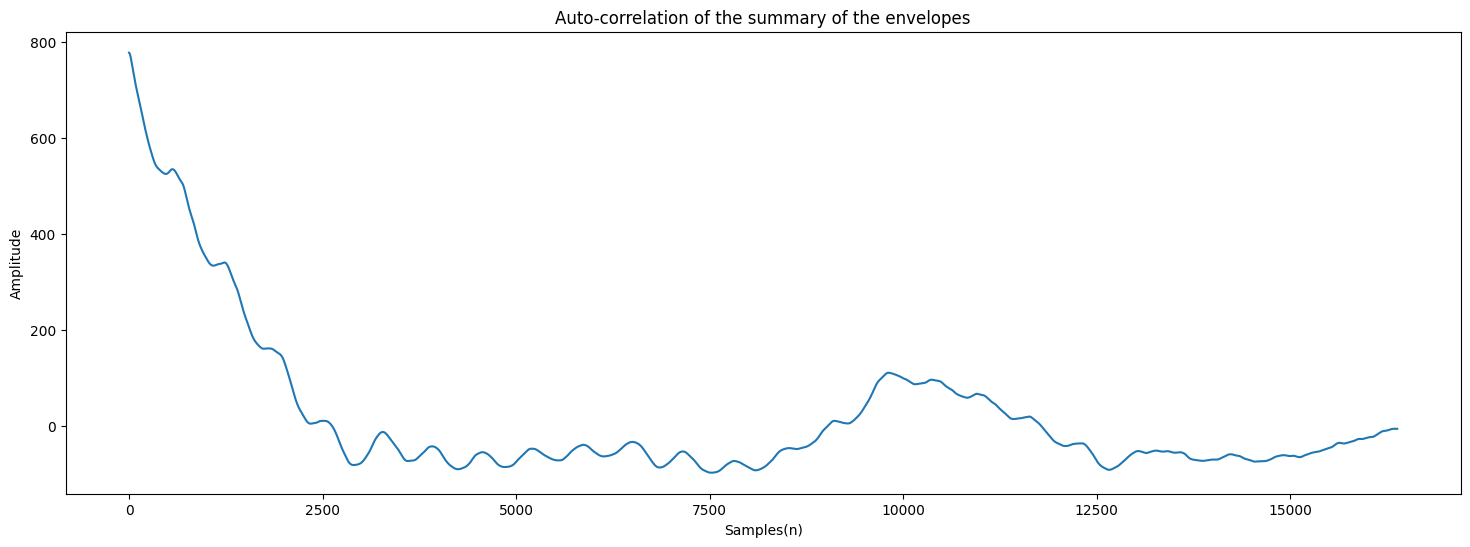

[777.42664045 777.35665256 777.23682093 ...  -5.41218148  -5.39080942
  -5.36680261]


In [50]:
#4.4
#For the signal: “rumba_excerpt.mp3”

x3i = [x31,x32,x33,x34,x35,x36,x37,x3a7]


perivSum3 = x3i[0]+interpolation(x3i[1],2)+interpolation(x3i[2],3)+interpolation(x3i[3],4)+interpolation(x3i[4],5)+interpolation(x3i[5],6)+interpolation(x3i[6],7)+interpolation(x3i[7],7)


autocorrelation3 = autocorr(perivSum3)
print(autocorrelation3.shape)
fig = plt.figure(figsize=(18,6))
n = np.linspace(0,len(autocorrelation3), len(autocorrelation3))
plt.xlabel("Samples(n)")
plt.ylabel("Amplitude")
plt.title("Auto-correlation of the summary of the envelopes")
plt.plot(n, autocorrelation3)
plt.show()
print(autocorrelation3)

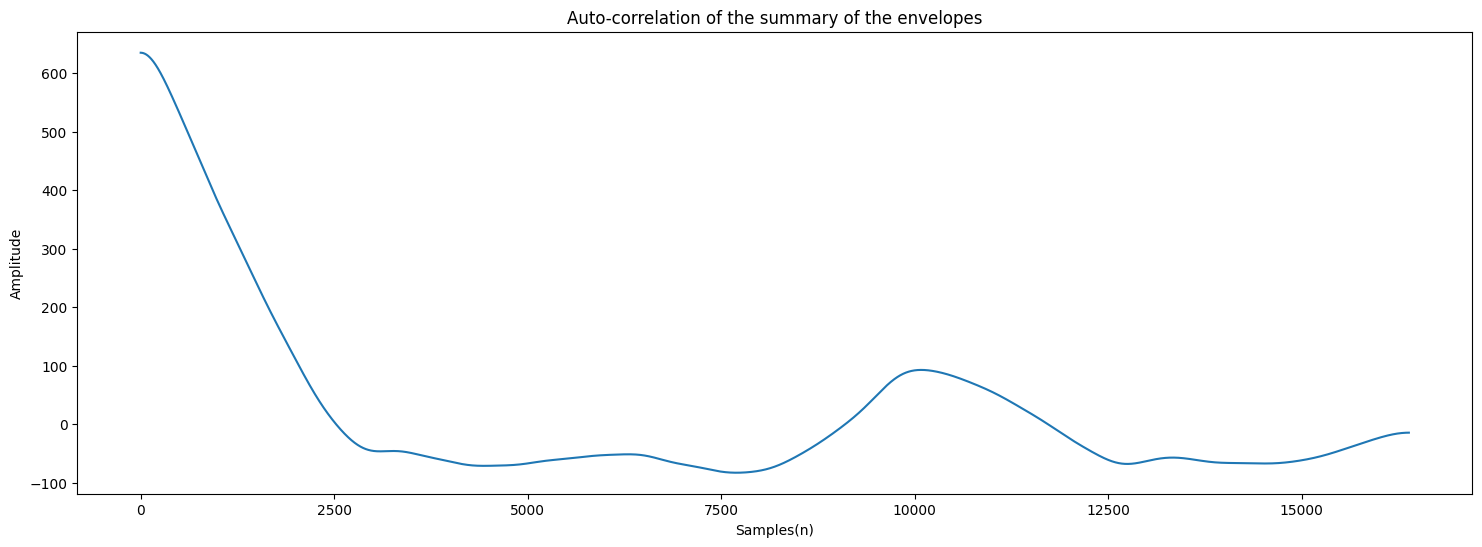

In [51]:
#we filter the signal with a gaussian filter to become more smooth

autocorr_gaussian_3 = sp.ndimage.gaussian_filter1d(autocorrelation3,280)
fig = plt.figure(figsize=(18,6))
n = np.linspace(0,len(autocorrelation3), len(autocorrelation3))
plt.xlabel("Samples(n)")
plt.ylabel("Amplitude")
plt.title("Auto-correlation of the summary of the envelopes")
plt.plot(n, autocorr_gaussian_3)
plt.show()

In [52]:
#4.5
#Computation of BPM
#For the signal: “rumba_excerpt.mp3”


peaks3 = sp.signal.argrelextrema(autocorr_gaussian_3, np.greater)
peaks3 = peaks3[0]
print(peaks3)

diffs3 = np.diff(peaks3)
tp3 = 60*22050/4/diffs3           #we divide with 4 because if we use the function np.correlate()
                                  # with mode = same we receive the result of autocorrelation with 2^14 samples
Bpm3=sum(tp3)/len(tp3)
print("BPM of Rumba = ",int(Bpm3))

[ 3263  6299 10083 13330]
BPM of Rumba =  99
